In [1]:
import UWGeodynamics as GEO
import matplotlib.pyplot as plt
import numpy as np
import underworld as uw
import underworld.function as fn
import glucifer

u = GEO.UnitRegistry

loaded rc file /opt/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
half_rate     = 0.15 * u.centimeter / u.year 
model_length  = 40. * u.kilometer
model_height  = 16. * u.kilometer
#topTemp       = 0+273
#baseTemp      = 100+213
surfaceTemp   = 273 * u.degK
baseModelTemp = 360 * u.degK # no data 
bodyforce     = 3300 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2 # 1530

KL = model_length
Kt = KL / half_rate
KM = bodyforce * KL**2 * Kt**2
KT = (baseModelTemp - surfaceTemp)


GEO.scaling_coefficients["[length]"]      = KL
GEO.scaling_coefficients["[time]"]        = Kt
GEO.scaling_coefficients["[mass]"]        = KM
GEO.scaling_coefficients["[temperature]"] = KT



In [3]:
resolution = (128,64)

Model = GEO.Model(elementRes=resolution, 
                  minCoord=(0. * u.kilometer, -11.4 * u.kilometer), 
                  maxCoord=(40. * u.kilometer, 12.0 * u.kilometer))

Model.outputDir="outputs_carbo4"


# In[6]:

Model.minViscosity  = 1e18 * u.pascal * u.second
Model.maxViscosity  = 5e23 * u.pascal * u.second
Model.stressLimiter = 500. * u.megapascal
Model.diffusivity   = 1e-6 * u.metre**2 / u.second
Model.capacity      = 1000. * u.joule / (u.kelvin * u.kilogram)
# Model.minViscosity = 1.0e5 * u.pascal * u.second
# Model.maxViscosity = 1e12 * u.pascal * u.second

In [4]:
# polygons

era_polygon      = GEO.shapes.Polygon(vertices=[(0.* u.kilometer, -0.2*u.kilometer),
                                                (40.* u.kilometer, 0.*u.kilometer),
                                                (40.* u.kilometer, -2.4*u.kilometer),
                                                (0.* u.kilometer, -2.9*u.kilometer)])

orubadi_polygon  = GEO.shapes.Polygon(vertices=[(0.* u.kilometer, -2.9*u.kilometer),
                                                (40.* u.kilometer, -2.4*u.kilometer),
                                                (40.* u.kilometer, -4.7*u.kilometer),
                                                (0.* u.kilometer, -4.9*u.kilometer)])

aure_polygon     = GEO.shapes.Polygon(vertices=[(29.37* u.kilometer, -4.8*u.kilometer),
                                                (40.* u.kilometer, -4.2*u.kilometer),
                                                (40.* u.kilometer, -4.7*u.kilometer)])

puri_polygon     = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -4.9*u.kilometer),
                                                (40* u.kilometer, -4.7*u.kilometer),
                                                (40.* u.kilometer, -5.2*u.kilometer),
                                                (0.* u.kilometer, -5.4*u.kilometer)])

mesozoic_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -5.4*u.kilometer),
                                                (40* u.kilometer, -5.2*u.kilometer),
                                                (40.* u.kilometer, -9.6*u.kilometer),
                                                (0.* u.kilometer, -9.6*u.kilometer)])

basement_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -6.4*u.kilometer),
                                                (22.5* u.kilometer, -7.4*u.kilometer),
                                                (26.* u.kilometer, -9.4*u.kilometer),
                                                (40* u.kilometer, -9.6*u.kilometer),
                                                (40.* u.kilometer, -16.*u.kilometer),
                                                (0.* u.kilometer, -16.*u.kilometer)])

decollement_orubadi_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -3.9*u.kilometer),
                                                (40.* u.kilometer, -3.7*u.kilometer),
                                                (40.* u.kilometer, -3.8*u.kilometer),
                                                (0.* u.kilometer, -4.*u.kilometer)])

decollement1_mesozoic_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -5.9*u.kilometer),
                                                (40.* u.kilometer, -6.1*u.kilometer),
                                                (40.* u.kilometer, -6.2*u.kilometer),
                                                (0.* u.kilometer, -6.*u.kilometer)])

decollement2_mesozoic_polygon = GEO.shapes.Polygon(vertices=[(23.*u.kilometer, -8.9*u.kilometer),
                                                (40.* u.kilometer, -9.1*u.kilometer),
                                                (40.* u.kilometer, -9.2*u.kilometer),
                                                (23.* u.kilometer, -9.*u.kilometer)])

carbonate_polygon = GEO.shapes.Polygon(vertices=[(19.6*u.kilometer, -4.8*u.kilometer),
                                                (20.2* u.kilometer, -4.3*u.kilometer),
                                                (26.125* u.kilometer, -4.3*u.kilometer),
                                                (27.37* u.kilometer, -4.8*u.kilometer)])

In [5]:


air         = Model.add_material(name="Air", shape=GEO.shapes.Layer(top=Model.top, bottom=Model.bottom))
era         = Model.add_material(name="era",shape=era_polygon)
orubadi     = Model.add_material(name="orubadi", shape=orubadi_polygon)
aure        = Model.add_material(name="aure", shape=aure_polygon)
carbonate   = Model.add_material(name="carbonate", shape=carbonate_polygon)


purimendi   = Model.add_material(name="purimendi", shape=puri_polygon)
mesozoic    = Model.add_material(name="mesozoic", shape=mesozoic_polygon)

decollement_orubadi    = Model.add_material(name="decollement_orubadi", shape=decollement_orubadi_polygon)
decollement1_mesozoic  = Model.add_material(name="decollement1_mesozoic", shape=decollement1_mesozoic_polygon)
decollement2_mesozoic  = Model.add_material(name="decollement2_mesozoic", shape=decollement2_mesozoic_polygon)

basement    = Model.add_material(name="basement", shape=basement_polygon)





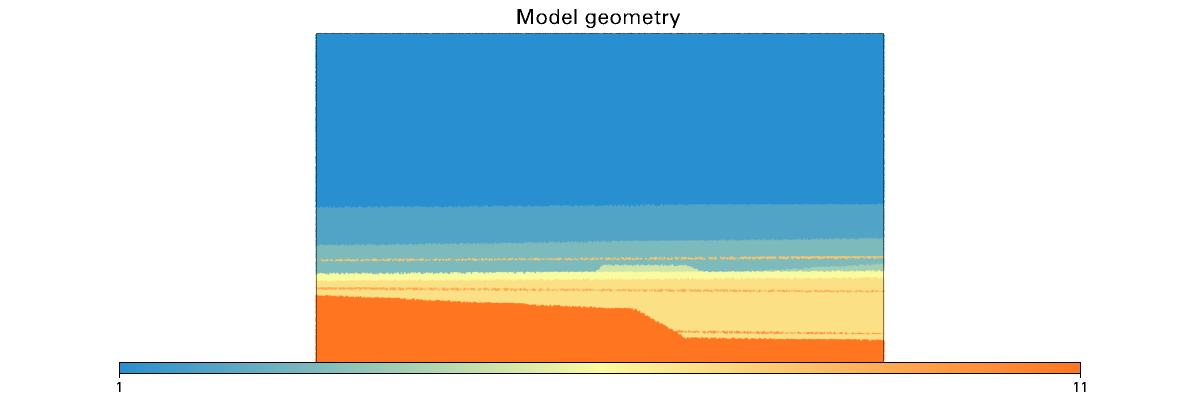

In [6]:
Fig = glucifer.Figure(figsize=(1200,400), title="Model geometry", quality=2)
Fig.Points(Model.swarm, Model.materialField, fn_size=3.)
Fig.show()

In [7]:
# Compressibility should be zero when using Lecode isostasy
#air.diffusivity   = 22e-6 * u.metre**2 / u.second# air.capacity = 100. * u.joule / (u.kelvin * u.kilogram)
air.diffusivity = 1.0e-6 * u.metre**2 / u.second
air.capacity = 1000. * u.joule / (u.kelvin * u.kilogram)


## Density

air.density       = 1. * u.kilogram / u.metre**3
era.density       = GEO.LinearDensity(2250. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
orubadi.density   = GEO.LinearDensity(2350. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
aure.density      = GEO.LinearDensity(2400. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
purimendi.density = GEO.LinearDensity(2650. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
mesozoic.density  = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
basement.density  = GEO.LinearDensity(2900. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
carbonate.density = GEO.LinearDensity(2750. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)

decollement_orubadi.density    = GEO.LinearDensity(2350. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
decollement1_mesozoic.density  = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
decollement2_mesozoic.density  = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)


## or:

# air.density       = 1. * u.kilogram / u.metre**3
# era.density       = 2250. * u.kilogram / u.metre**3
# orubadi.density   = 2350. * u.kilogram / u.metre**3
# aure.density      = 2400. * u.kilogram / u.metre**3 # no data
# purimendi.density = 2600. * u.kilogram / u.metre**3 
# mesozoic.density  = 2700. * u.kilogram / u.metre**3 
# basement.density  = 2900. * u.kilogram / u.metre**3 # no data 2500. to 2900.

# decollement_orubadi.density    = 2350. * u.kilogram / u.metre**3
# decollement1_mesozoic.density  = 2700. * u.kilogram / u.metre**3
# decollement2_mesozoic.density  = 2700. * u.kilogram / u.metre**3

 

## Radioganic Heat Production # no data

# era.radiogenicHeatProd       = 1. * u.microwatt / u.meter**3
# orubadi.radiogenicHeatProd   = 1. * u.microwatt / u.meter**3
# aure.radiogenicHeatProd      = 1. * u.microwatt / u.meter**3
# purimendi.radiogenicHeatProd = 1. * u.microwatt / u.meter**3
# mesozoic.radiogenicHeatProd  = 1. * u.microwatt / u.meter**3
# basement.radiogenicHeatProd  = 1. * u.microwatt / u.meter**3

# decollement_orubadi.radiogenicHeatProd   = 1. * u.microwatt / u.meter**3
# decollement1_mesozoic.radiogenicHeatProd = 1. * u.microwatt / u.meter**3
# decollement1_mesozoic.radiogenicHeatProd = 1. * u.microwatt / u.meter**3


## Viscous Rheologies # no data so isoviscous

rh = GEO.ViscousCreepRegistry()



air.viscosity       = 1e18 * u.pascal * u.second
era.viscosity       = 1e22 * u.pascal * u.second
orubadi.viscosity   = 1e22 * u.pascal * u.second
aure.viscosity      = 1e22 * u.pascal * u.second
purimendi.viscosity = 1e22 * u.pascal * u.second
mesozoic.viscosity  = 1e22 * u.pascal * u.second
basement.viscosity  = 1e22 * u.pascal * u.second # 5e21 lower crust
# fault.viscosity              = 5e22 * u.pascal * u.second
carbonate.viscosity = purimendi.viscosity



decollement_orubadi.viscosity    = 1e22 * u.pascal * u.second
decollement1_mesozoic.viscosity  = 1e22 * u.pascal * u.second
decollement2_mesozoic.viscosity  = 1e22 * u.pascal * u.second


In [8]:


## Plasticities

pl = GEO.PlasticityRegistry()

# sediment.plasticity #same for uppercrust     = GEO.DruckerPrager(name="Sediment Plasticity",
#                                             cohesion=40. * u.megapascal,
#                                             cohesionAfterSoftening=4.0 * u.megapascal,
#                                             frictionCoefficient=0.268,
#                                             frictionAfterSoftening=0.0268,
#                                             epsilon1=0.0, epsilon2=0.15)
# sediment.stressLimiter  = 1000. * u.megapascal



era.plasticity = GEO.DruckerPrager(name="era_pl",
                                         cohesion=10. * u.megapascal, #20.
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.567,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.0, epsilon2=0.2)

orubadi.plasticity = GEO.DruckerPrager(name="orubadi_pl",
                                        cohesion=20. * u.megapascal,
                                        cohesionAfterSoftening=3. * u.megapascal,
                                        frictionCoefficient=0.567,
                                        frictionAfterSoftening=0.112,
                                        epsilon1=0.0, epsilon2=0.2)

aure.plasticity  = GEO.DruckerPrager(name="aure_pl",
                                        cohesion=20. * u.megapascal,
                                        cohesionAfterSoftening=3. * u.megapascal,
                                        frictionCoefficient=0.567,
                                        frictionAfterSoftening=0.112,
                                        epsilon1=0.0, epsilon2=0.2)
purimendi.plasticity = GEO.DruckerPrager(name="purimendi_pl",
                                        cohesion=20. * u.megapascal,
                                        cohesionAfterSoftening=3. * u.megapascal,
                                        frictionCoefficient=0.567,
                                        frictionAfterSoftening=0.112,
                                        epsilon1=0.0, epsilon2=0.2)

mesozoic.plasticity  = GEO.DruckerPrager(name="mesozoic_pl",
                                         cohesion=30. * u.megapascal,
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.567,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.0, epsilon2=0.2)

basement.plasticity  = GEO.DruckerPrager(name="basement_pl",
                                         cohesion=20. * u.megapascal,
                                         cohesionAfterSoftening=4. * u.megapascal,
                                         frictionCoefficient=0.577,
                                         frictionAfterSoftening=0.1154,
                                         epsilon1=0.0, epsilon2=0.2)

# fault.plasticity = GEO.DruckerPrager(name="fault_pl",
#                                      cohesion=20. * u.megapascal,
#                                      cohesionAfterSoftening=0.8 * u.megapascal,
#                                      frictionCoefficient=0.577,
#                                      frictionAfterSoftening=0.02308,
#                                      epsilon1=0.0, epsilon2=0.2)

carbonate.plasticity = purimendi.plasticity

decollement_orubadi.plasticity    = era.plasticity
decollement1_mesozoic.plasticity  = mesozoic.plasticity
decollement2_mesozoic.plasticity  = mesozoic.plasticity


era.stressLimiter = 75.0 * u.megapascal
orubadi.stressLimiter   = 75.0 * u.megapascal
aure.stressLimiter      = 75.0 * u.megapascal
purimendi.stressLimiter = 75.0 * u.megapascal
mesozoic.stressLimiter  = 75.0 * u.megapascal
basement.stressLimiter  = 150.0 * u.megapascal
#fault.stressLimiter = 50.0 * u.megapascal

carbonate.stressLimiter = purimendi.stressLimiter

decollement_orubadi.stressLimiter = 75.0 * u.megapascal
decollement1_mesozoic.stressLimiter = 75.0 * u.megapascal
decollement2_mesozoic.stressLimiter = 75.0 * u.megapascal




In [9]:
solidii = GEO.SolidusRegistry()
crust_solidus = solidii.Crustal_Solidus
mantle_solidus = solidii.Mantle_Solidus

liquidii = GEO.LiquidusRegistry()
crust_liquidus = liquidii.Crustal_Liquidus
mantle_liquidus = liquidii.Mantle_Liquidus

basement.add_melt_modifier(crust_solidus, crust_liquidus, 
                         latentHeatFusion=250.0 * u.kilojoules / u.kilogram / u.kelvin,
                         meltFraction=0.,
                         meltFractionLimit=0.3,
                         meltExpansion=0.13, 
                         viscosityChangeX1 = 0.15,
                         viscosityChangeX2 = 0.30,
                         viscosityChange = 1.0e-3
                        )



In [10]:
Model.set_temperatureBCs(top=273. * u.degK, 
                         bottom=313. * u.degK, 
                         materials=[(air, 273. * u.degK)])

Model.set_velocityBCs(left=[0. * u.kilometer / u.year, None],
                      right=[-0.33 * u.centimeter / u.year, None],
                      bottom = [None , 0.])




In [11]:
x_c, y_c = GEO.circles_grid(radius=0.5*u.kilometer, 
                     minCoord=[Model.minCoord[0], Model.bottom], 
                     maxCoord=[Model.maxCoord[0], 0.*u.kilometer])

FSE_Crust = Model.add_passive_tracers(name="FSE_Crust", vertices=[x_c, y_c])

In [12]:
Model.init_model()

In [13]:
# Fig = glucifer.Figure(figsize=(1200,400), title="Temperature", quality=2)
# Fig.Points(Model.swarm, GEO.Dimensionalize(Model.temperature, u.degK), fn_size=3.0)
# Fig.show()

In [14]:
# Fig = glucifer.Figure(figsize=(1200,400), title="Pressure (MPa)", quality=2)
# Fig.Surface(Model.mesh, GEO.Dimensionalize(Model.pressureField, u.megapascal), fn_size=2.0)
# Fig.show()

In [15]:
Model.solver.set_inner_method("mumps")
Model.solver.set_penalty(1e6)
#GEO.rcParams["advection.diffusion.method"] = "SLCN"

In [16]:
x = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), 4800) 
y = 0. * u.kilometer

surface_tracers = Model.add_passive_tracers(name="Surface", vertices=[x, y])
moho_tracers = Model.add_passive_tracers(name="Moho", vertices=[x,y-5.*u.kilometer])
Lab_tracers = Model.add_passive_tracers(name="Lab", vertices=[x,y-10.*u.kilometer])

#x = 100. * u.kilometer
#y = np.linspace(Model.minCoord[1], Model.maxCoord[1], 1000) * u.kilometer
#vertical_tracers1 = Model.add_passive_tracers(vertices=[x,y])

x1 = 480. * u.kilometer
y1 = -20. * u.kilometer
pt1_tracer = Model.add_passive_tracers(name="Pt1", vertices=[x1, y1])

#P1 = Model.add_passive_tracers(vertices=[x1,y1])

#moho_tracers.add_tracked_field(Model.temperature, name="moho_tracers" , dataType="float", units=u.degK, count=1, overwrite=True)
#moho_tracers.add_tracked_field(Model.temperature, name="Temperature" , dataType="float", units=u.degK, count=1, overwrite=True)
moho_tracers.add_tracked_field(Model.pressureField, name="Pressure" , dataType="float", units=u.megapascal, count=1, overwrite=True)

#surface_tracers.add_tracked_field(Model.temperature, name="Temperature" , dataType="float", units=u.degK, count=1, overwrite=True)
surface_tracers.add_tracked_field(Model.pressureField, name="Pressure" , dataType="float", units=u.megapascal, count=1, overwrite=True)

#pt1_tracer.add_tracked_field(Model.temperature, name="Temperature" , dataType="float", units=u.degK, count=1, overwrite=True)
#pt1_tracer.add_tracked_field(Model.pressureField, name="Pressure" , dataType="float", units=u.megapascal, count=1, overwrite=True)
#pt1_tracers2 = Model.pt1_tracer.add_tracked_field(Model.strainRateField, name="Pt1_StrainRate", dataType="float", units=u.sec, count=1, overwrite=True)
pt1_tracer.add_tracked_field(Model.temperature, name="Pt1_Temp", dataType="float", units=u.degK, count=1, overwrite=True)
pt1_tracer.add_tracked_field(Model.pressureField, name="Pt1_Press", dataType="float", units=u.megapascal, count=1, overwrite=False)
pt1_tracer.add_tracked_field(Model.strainRateField, name="Pt1_StrainRate", dataType="float", units=u.sec, count=1, overwrite=False)
#Moho = moho_tracers.add_variable( dataType="double", count=1 )

In [17]:
# x2 = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), 1000) 
# y2 = -10. * u.kilometer
# level_tracers = Model.add_passive_tracers(name="Level", vertices=[x2,y2])
# level_tracers2 = Model.level_tracers.add_tracked_field(Model.strainRateField, name="Lev_StrainRate", dataType="float", units=u.sec, count=1, overwrite=True)


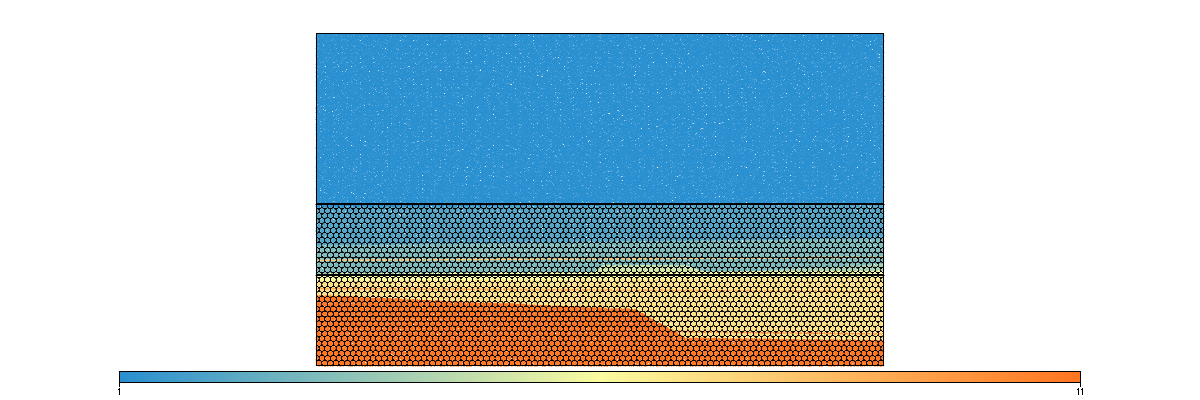

In [18]:
# x_c, y_c = GEO.circles_grid(radius=0.2*u.kilometer, 
#                     minCoord=[Model.minCoord[0], basement.top], 
#                     maxCoord=[Model.maxCoord[0], 0.*u.kilometer])
# circles_c = Model.add_passive_tracers(name="FSE_Crust", vertices=[x_c, y_c])

x_m, y_m = GEO.circles_grid(radius=0.2*u.kilometer, 
                    minCoord=[Model.minCoord[0], Model.bottom], 
                    maxCoord=[Model.maxCoord[0], 0.*u.kilometer])
circles_m = Model.add_passive_tracers(name="FSE_Mantle", vertices=[x_m, y_m])

import glucifer
Fig = glucifer.Figure(figsize=(1200,400), fn_size=4.0)
Fig.Points(surface_tracers.swarm, pointSize=2.0)
Fig.Points(moho_tracers.swarm, pointSize=2.0)
# Fig.Points(circles_c.swarm, pointSize=1.5)
Fig.Points(circles_m.swarm, pointSize=0.1)
Fig.Points(Model.swarm, Model.materialField, fn_size=2.0)
Fig.show()





In [19]:
# mohoT = Model.temperature.evaluate(moho_tracers.swarm)[:,0].mean()
# print("Moho Temperature = ", GEO.Dimensionalize(mohoT, u.degC)) 

# LabT = Model.temperature.evaluate(Lab_tracers.swarm)[:,0].mean()
# print("Lab Temperature = ", GEO.Dimensionalize(LabT, u.degC)) 


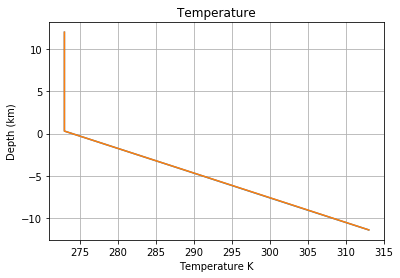

In [20]:

MyTemperatureField=(Model.temperature.data[:] * GEO.Dimensionalize(1.0, u.degK)).magnitude 

TemperatureData=np.asarray(MyTemperatureField)
#ViscosityDataShaped=ViscosityData.reshape(81,321)
TemperatureDataShaped=TemperatureData.reshape(resolution[1]+1,resolution[0]+1)

#Two profiles located at the left walls and the middle.
plt.plot(TemperatureDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]+1))
plt.plot(TemperatureDataShaped[:, resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]+1))

## plt.yticks([-700,-300,-150,-40,0,68])
## plt.xticks([20, 550.0, 1350])
plt.grid()
#plt.xscale('log')
plt.xlabel('Temperature K')
plt.ylabel('Depth (km)')
plt.title('Temperature')
plt.show()



In [21]:
# MyPressureField=(Model.pressureField.data[:] * GEO.Dimensionalize(1.0, u.megapascal)).magnitude 

# PressureData=np.asarray(MyPressureField)
# #ViscosityDataShaped=ViscosityData.reshape(81,321)
# PressureDataShaped=PressureData.reshape(resolution[1],resolution[0])

# #Two profiles located at the left walls and the middle.
# plt.plot(PressureDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]))
# plt.plot(PressureDataShaped[:,resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]))

# ## plt.yticks([-700,-300,-150,-40,0,68])
# ## plt.xticks([20, 550.0, 1350])
# plt.grid()
# #plt.xscale('log')
# plt.xlabel('Pressure MPa')
# plt.ylabel('Depth (km)')
# plt.title('Pressure')
# plt.show()




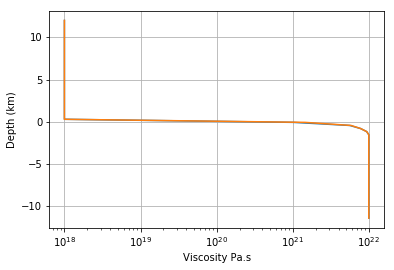

In [22]:
MyViscosityField=(Model.projViscosityField.data[:] * GEO.Dimensionalize(1.0, u.pascal * u.second)).magnitude 

ViscosityData=np.asarray(MyViscosityField)
#ViscosityDataShaped=ViscosityData.reshape(81,321)
ViscosityDataShaped=ViscosityData.reshape(resolution[1]+1,resolution[0]+1)

#Two profiles located at the left walls and the middle.
plt.plot(ViscosityDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]+1))
plt.plot(ViscosityDataShaped[:,resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]+1))



## plt.yticks([-700,-300,-150,-40,0,68])
## plt.xticks([20, 550.0, 1350])
plt.grid()
plt.xscale('log')
plt.xlabel('Viscosity Pa.s')
plt.ylabel('Depth (km)')
## plt.title('Viscosity')
plt.show()



In [23]:
GEO.rcParams["initial.nonlinear.tolerance"] = 1e-2
GEO.rcParams["nonlinear.tolerance"] = 1e-2
#GEO.rcParams["solver"] = "mumps"
#GEO.rcParams["penalty"] = 0
GEO.rcParams["swarm.particles.per.cell.2D"] = 30

In [24]:
# Model.solve()


In [25]:
# MyStressField=(Model.projStressField.data[:] * GEO.Dimensionalize(1.0, u.megapascal)).magnitude 

# StressData=np.asarray(MyStressField)
# #StressDataShaped=StressData.reshape(120,480)
# StressDataShaped=StressData.reshape(resolution[1],resolution[0])

# #Two profiles located at the left walls and the middle.

# plt.plot(StressDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]))
# plt.plot(StressDataShaped[:,resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]))


# ## plt.yticks([-700,-300,-150,-40,0,68])
# ## plt.xticks([20, 550.0, 1350])
# plt.grid()
# plt.xlabel('Stress MPa')
# plt.ylabel('Depth (km)')
# plt.title('Deviatoric Stress')
# plt.show()

In [26]:
# Fig = glucifer.Figure(figsize=(1200,400), quality=2)
# Fig.VectorArrows(Model.mesh, GEO.Dimensionalize(Model.velocityField, u.millimeter / u.year), fn_size=2.0)
# Fig.show()

In [27]:
#help(Model.run_for)
# Model.run_for(nstep=1000)
Model.run_for(10.0 * u.megayear, checkpoint_interval=0.05*u.megayear)

Running with UWGeodynamics version 2.7.7
Options:  -remove_constant_pressure_null_space False -ksp_k2_type NULL -change_backsolve False -pc_type none -force_correction True -Q22_pc_type gkgdiag -change_A11rhspresolve False -ksp_type bsscr -rescale_equations False -restore_K False -A11_pc_type lu -A11_pc_factor_mat_solver_package mumps -A11_ksp_type preonly -scr_ksp_type fgmres -scr_ksp_rtol 1e-05 -A11_mg_active False
Step:     1 Model Time: 0.00 megayear dt: 0.00 megayear (2019-08-28 06:59:06)
Step:     2 Model Time: 0.00 megayear dt: 0.00 megayear (2019-08-28 06:59:13)
Step:     3 Model Time: 0.00 megayear dt: 0.00 megayear (2019-08-28 06:59:21)
Step:     4 Model Time: 0.01 megayear dt: 0.00 megayear (2019-08-28 06:59:29)
Step:     5 Model Time: 0.01 megayear dt: 0.00 megayear (2019-08-28 06:59:37)
Step:     6 Model Time: 0.01 megayear dt: 0.00 megayear (2019-08-28 06:59:45)
Step:     7 Model Time: 0.01 megayear dt: 0.00 megayear (2019-08-28 06:59:53)
Step:     8 Model Time: 0.01 mega

Step:   101 Model Time: 0.15 megayear dt: 0.00 megayear (2019-08-28 07:13:27)
Step:   102 Model Time: 0.15 megayear dt: 0.00 megayear (2019-08-28 07:13:35)
Step:   103 Model Time: 0.16 megayear dt: 0.00 megayear (2019-08-28 07:13:43)
Step:   104 Model Time: 0.16 megayear dt: 0.00 megayear (2019-08-28 07:13:51)
Step:   105 Model Time: 0.16 megayear dt: 0.00 megayear (2019-08-28 07:13:59)
Step:   106 Model Time: 0.16 megayear dt: 0.00 megayear (2019-08-28 07:14:07)
Step:   107 Model Time: 0.16 megayear dt: 0.00 megayear (2019-08-28 07:14:15)
Step:   108 Model Time: 0.16 megayear dt: 0.00 megayear (2019-08-28 07:14:23)
Step:   109 Model Time: 0.17 megayear dt: 0.00 megayear (2019-08-28 07:14:31)
Step:   110 Model Time: 0.17 megayear dt: 0.00 megayear (2019-08-28 07:14:39)
Step:   111 Model Time: 0.17 megayear dt: 0.00 megayear (2019-08-28 07:14:47)
Step:   112 Model Time: 0.17 megayear dt: 0.00 megayear (2019-08-28 07:14:55)
Step:   113 Model Time: 0.17 megayear dt: 0.00 megayear (2019-08

Step:   207 Model Time: 0.31 megayear dt: 0.00 megayear (2019-08-28 07:28:38)
Step:   208 Model Time: 0.32 megayear dt: 0.00 megayear (2019-08-28 07:28:46)
Step:   209 Model Time: 0.32 megayear dt: 0.00 megayear (2019-08-28 07:28:54)
Step:   210 Model Time: 0.32 megayear dt: 0.00 megayear (2019-08-28 07:29:02)
Step:   211 Model Time: 0.32 megayear dt: 0.00 megayear (2019-08-28 07:29:09)
Step:   212 Model Time: 0.32 megayear dt: 0.00 megayear (2019-08-28 07:29:17)
Step:   213 Model Time: 0.32 megayear dt: 0.00 megayear (2019-08-28 07:29:25)
Step:   214 Model Time: 0.32 megayear dt: 0.00 megayear (2019-08-28 07:29:33)
Step:   215 Model Time: 0.33 megayear dt: 0.00 megayear (2019-08-28 07:29:41)
Step:   216 Model Time: 0.33 megayear dt: 0.00 megayear (2019-08-28 07:29:48)
Step:   217 Model Time: 0.33 megayear dt: 0.00 megayear (2019-08-28 07:29:56)
Step:   218 Model Time: 0.33 megayear dt: 0.00 megayear (2019-08-28 07:30:04)
Step:   219 Model Time: 0.33 megayear dt: 0.00 megayear (2019-08

Step:   313 Model Time: 0.47 megayear dt: 0.00 megayear (2019-08-28 07:43:48)
Step:   314 Model Time: 0.48 megayear dt: 0.00 megayear (2019-08-28 07:43:56)
Step:   315 Model Time: 0.48 megayear dt: 0.00 megayear (2019-08-28 07:44:04)
Step:   316 Model Time: 0.48 megayear dt: 0.00 megayear (2019-08-28 07:44:12)
Step:   317 Model Time: 0.48 megayear dt: 0.00 megayear (2019-08-28 07:44:20)
Step:   318 Model Time: 0.48 megayear dt: 0.00 megayear (2019-08-28 07:44:28)
Step:   319 Model Time: 0.48 megayear dt: 0.00 megayear (2019-08-28 07:44:36)
Step:   320 Model Time: 0.49 megayear dt: 0.00 megayear (2019-08-28 07:44:44)
Step:   321 Model Time: 0.49 megayear dt: 0.00 megayear (2019-08-28 07:44:52)
Step:   322 Model Time: 0.49 megayear dt: 0.00 megayear (2019-08-28 07:45:01)
Step:   323 Model Time: 0.49 megayear dt: 0.00 megayear (2019-08-28 07:45:09)
Step:   324 Model Time: 0.49 megayear dt: 0.00 megayear (2019-08-28 07:45:17)
Step:   325 Model Time: 0.49 megayear dt: 0.00 megayear (2019-08

Step:   419 Model Time: 0.64 megayear dt: 0.00 megayear (2019-08-28 07:59:14)
Step:   420 Model Time: 0.64 megayear dt: 0.00 megayear (2019-08-28 07:59:22)
Step:   421 Model Time: 0.64 megayear dt: 0.00 megayear (2019-08-28 07:59:30)
Step:   422 Model Time: 0.64 megayear dt: 0.00 megayear (2019-08-28 07:59:38)
Step:   423 Model Time: 0.64 megayear dt: 0.00 megayear (2019-08-28 07:59:46)
Step:   424 Model Time: 0.64 megayear dt: 0.00 megayear (2019-08-28 07:59:54)
Step:   425 Model Time: 0.64 megayear dt: 0.00 megayear (2019-08-28 08:00:02)
Step:   426 Model Time: 0.65 megayear dt: 0.00 megayear (2019-08-28 08:00:10)
Step:   427 Model Time: 0.65 megayear dt: 0.00 megayear (2019-08-28 08:00:18)
Step:   428 Model Time: 0.65 megayear dt: 0.00 megayear (2019-08-28 08:00:26)
Step:   429 Model Time: 0.65 megayear dt: 0.00 megayear (2019-08-28 08:00:57)
Step:   430 Model Time: 0.65 megayear dt: 0.00 megayear (2019-08-28 08:01:05)
Step:   431 Model Time: 0.65 megayear dt: 0.00 megayear (2019-08

Step:   525 Model Time: 0.80 megayear dt: 0.00 megayear (2019-08-28 08:15:07)
Step:   526 Model Time: 0.80 megayear dt: 0.00 megayear (2019-08-28 08:15:16)
Step:   527 Model Time: 0.80 megayear dt: 0.00 megayear (2019-08-28 08:15:25)
Step:   528 Model Time: 0.80 megayear dt: 0.00 megayear (2019-08-28 08:15:57)
Step:   529 Model Time: 0.80 megayear dt: 0.00 megayear (2019-08-28 08:16:05)
Step:   530 Model Time: 0.80 megayear dt: 0.00 megayear (2019-08-28 08:16:14)
Step:   531 Model Time: 0.80 megayear dt: 0.00 megayear (2019-08-28 08:16:22)
Step:   532 Model Time: 0.81 megayear dt: 0.00 megayear (2019-08-28 08:16:31)
Step:   533 Model Time: 0.81 megayear dt: 0.00 megayear (2019-08-28 08:16:39)
Step:   534 Model Time: 0.81 megayear dt: 0.00 megayear (2019-08-28 08:16:48)
Step:   535 Model Time: 0.81 megayear dt: 0.00 megayear (2019-08-28 08:16:56)
Step:   536 Model Time: 0.81 megayear dt: 0.00 megayear (2019-08-28 08:17:05)
Step:   537 Model Time: 0.81 megayear dt: 0.00 megayear (2019-08

Step:   631 Model Time: 0.96 megayear dt: 0.00 megayear (2019-08-28 08:31:47)
Step:   632 Model Time: 0.96 megayear dt: 0.00 megayear (2019-08-28 08:31:56)
Step:   633 Model Time: 0.96 megayear dt: 0.00 megayear (2019-08-28 08:32:04)
Step:   634 Model Time: 0.96 megayear dt: 0.00 megayear (2019-08-28 08:32:13)
Step:   635 Model Time: 0.96 megayear dt: 0.00 megayear (2019-08-28 08:32:21)
Step:   636 Model Time: 0.96 megayear dt: 0.00 megayear (2019-08-28 08:32:30)
Step:   637 Model Time: 0.97 megayear dt: 0.00 megayear (2019-08-28 08:32:38)
Step:   638 Model Time: 0.97 megayear dt: 0.00 megayear (2019-08-28 08:32:47)
Step:   639 Model Time: 0.97 megayear dt: 0.00 megayear (2019-08-28 08:32:56)
Step:   640 Model Time: 0.97 megayear dt: 0.00 megayear (2019-08-28 08:33:04)
Step:   641 Model Time: 0.97 megayear dt: 0.00 megayear (2019-08-28 08:33:13)
Step:   642 Model Time: 0.97 megayear dt: 0.00 megayear (2019-08-28 08:33:21)
Step:   643 Model Time: 0.97 megayear dt: 0.00 megayear (2019-08

Step:   737 Model Time: 1.12 megayear dt: 0.00 megayear (2019-08-28 08:48:11)
Step:   738 Model Time: 1.12 megayear dt: 0.00 megayear (2019-08-28 08:48:19)
Step:   739 Model Time: 1.12 megayear dt: 0.00 megayear (2019-08-28 08:48:28)
Step:   740 Model Time: 1.12 megayear dt: 0.00 megayear (2019-08-28 08:48:37)
Step:   741 Model Time: 1.12 megayear dt: 0.00 megayear (2019-08-28 08:48:45)
Step:   742 Model Time: 1.12 megayear dt: 0.00 megayear (2019-08-28 08:48:54)
Step:   743 Model Time: 1.13 megayear dt: 0.00 megayear (2019-08-28 08:49:03)
Step:   744 Model Time: 1.13 megayear dt: 0.00 megayear (2019-08-28 08:49:12)
Step:   745 Model Time: 1.13 megayear dt: 0.00 megayear (2019-08-28 08:49:20)
Step:   746 Model Time: 1.13 megayear dt: 0.00 megayear (2019-08-28 08:49:29)
Step:   747 Model Time: 1.13 megayear dt: 0.00 megayear (2019-08-28 08:49:38)
Step:   748 Model Time: 1.13 megayear dt: 0.00 megayear (2019-08-28 08:49:46)
Step:   749 Model Time: 1.14 megayear dt: 0.00 megayear (2019-08

Step:   843 Model Time: 1.28 megayear dt: 0.00 megayear (2019-08-28 09:04:48)
Step:   844 Model Time: 1.28 megayear dt: 0.00 megayear (2019-08-28 09:04:57)
Step:   845 Model Time: 1.28 megayear dt: 0.00 megayear (2019-08-28 09:05:06)
Step:   846 Model Time: 1.28 megayear dt: 0.00 megayear (2019-08-28 09:05:14)
Step:   847 Model Time: 1.28 megayear dt: 0.00 megayear (2019-08-28 09:05:23)
Step:   848 Model Time: 1.29 megayear dt: 0.00 megayear (2019-08-28 09:05:31)
Step:   849 Model Time: 1.29 megayear dt: 0.00 megayear (2019-08-28 09:05:40)
Step:   850 Model Time: 1.29 megayear dt: 0.00 megayear (2019-08-28 09:05:49)
Step:   851 Model Time: 1.29 megayear dt: 0.00 megayear (2019-08-28 09:05:57)
Step:   852 Model Time: 1.29 megayear dt: 0.00 megayear (2019-08-28 09:06:06)
Step:   853 Model Time: 1.29 megayear dt: 0.00 megayear (2019-08-28 09:06:14)
Step:   854 Model Time: 1.29 megayear dt: 0.00 megayear (2019-08-28 09:06:23)
Step:   855 Model Time: 1.30 megayear dt: 0.00 megayear (2019-08

Step:   949 Model Time: 1.44 megayear dt: 0.00 megayear (2019-08-28 09:21:16)
Step:   950 Model Time: 1.44 megayear dt: 0.00 megayear (2019-08-28 09:21:24)
Step:   951 Model Time: 1.44 megayear dt: 0.00 megayear (2019-08-28 09:21:33)
Step:   952 Model Time: 1.44 megayear dt: 0.00 megayear (2019-08-28 09:21:42)
Step:   953 Model Time: 1.44 megayear dt: 0.00 megayear (2019-08-28 09:21:50)
Step:   954 Model Time: 1.45 megayear dt: 0.00 megayear (2019-08-28 09:21:59)
Step:   955 Model Time: 1.45 megayear dt: 0.00 megayear (2019-08-28 09:22:08)
Step:   956 Model Time: 1.45 megayear dt: 0.00 megayear (2019-08-28 09:22:16)
Step:   957 Model Time: 1.45 megayear dt: 0.00 megayear (2019-08-28 09:22:48)
Step:   958 Model Time: 1.45 megayear dt: 0.00 megayear (2019-08-28 09:22:57)
Step:   959 Model Time: 1.45 megayear dt: 0.00 megayear (2019-08-28 09:23:06)
Step:   960 Model Time: 1.45 megayear dt: 0.00 megayear (2019-08-28 09:23:14)
Step:   961 Model Time: 1.46 megayear dt: 0.00 megayear (2019-08

Step:  1055 Model Time: 1.60 megayear dt: 0.00 megayear (2019-08-28 09:37:43)
Step:  1056 Model Time: 1.60 megayear dt: 0.00 megayear (2019-08-28 09:38:16)
Step:  1057 Model Time: 1.60 megayear dt: 0.00 megayear (2019-08-28 09:38:24)
Step:  1058 Model Time: 1.60 megayear dt: 0.00 megayear (2019-08-28 09:38:33)
Step:  1059 Model Time: 1.60 megayear dt: 0.00 megayear (2019-08-28 09:38:42)
Step:  1060 Model Time: 1.61 megayear dt: 0.00 megayear (2019-08-28 09:38:51)
Step:  1061 Model Time: 1.61 megayear dt: 0.00 megayear (2019-08-28 09:38:59)
Step:  1062 Model Time: 1.61 megayear dt: 0.00 megayear (2019-08-28 09:39:08)
Step:  1063 Model Time: 1.61 megayear dt: 0.00 megayear (2019-08-28 09:39:17)
Step:  1064 Model Time: 1.61 megayear dt: 0.00 megayear (2019-08-28 09:39:25)
Step:  1065 Model Time: 1.61 megayear dt: 0.00 megayear (2019-08-28 09:39:34)
Step:  1066 Model Time: 1.62 megayear dt: 0.00 megayear (2019-08-28 09:39:43)
Step:  1067 Model Time: 1.62 megayear dt: 0.00 megayear (2019-08

Step:  1161 Model Time: 1.76 megayear dt: 0.00 megayear (2019-08-28 09:54:44)
Step:  1162 Model Time: 1.76 megayear dt: 0.00 megayear (2019-08-28 09:54:53)
Step:  1163 Model Time: 1.76 megayear dt: 0.00 megayear (2019-08-28 09:55:02)
Step:  1164 Model Time: 1.76 megayear dt: 0.00 megayear (2019-08-28 09:55:11)
Step:  1165 Model Time: 1.77 megayear dt: 0.00 megayear (2019-08-28 09:55:20)
Step:  1166 Model Time: 1.77 megayear dt: 0.00 megayear (2019-08-28 09:55:28)
Step:  1167 Model Time: 1.77 megayear dt: 0.00 megayear (2019-08-28 09:55:37)
Step:  1168 Model Time: 1.77 megayear dt: 0.00 megayear (2019-08-28 09:55:46)
Step:  1169 Model Time: 1.77 megayear dt: 0.00 megayear (2019-08-28 09:55:55)
Step:  1170 Model Time: 1.77 megayear dt: 0.00 megayear (2019-08-28 09:56:04)
Step:  1171 Model Time: 1.77 megayear dt: 0.00 megayear (2019-08-28 09:56:13)
Step:  1172 Model Time: 1.78 megayear dt: 0.00 megayear (2019-08-28 09:56:22)
Step:  1173 Model Time: 1.78 megayear dt: 0.00 megayear (2019-08

Step:  1267 Model Time: 1.92 megayear dt: 0.00 megayear (2019-08-28 10:11:29)
Step:  1268 Model Time: 1.92 megayear dt: 0.00 megayear (2019-08-28 10:11:38)
Step:  1269 Model Time: 1.92 megayear dt: 0.00 megayear (2019-08-28 10:11:47)
Step:  1270 Model Time: 1.92 megayear dt: 0.00 megayear (2019-08-28 10:11:56)
Step:  1271 Model Time: 1.93 megayear dt: 0.00 megayear (2019-08-28 10:12:04)
Step:  1272 Model Time: 1.93 megayear dt: 0.00 megayear (2019-08-28 10:12:13)
Step:  1273 Model Time: 1.93 megayear dt: 0.00 megayear (2019-08-28 10:12:22)
Step:  1274 Model Time: 1.93 megayear dt: 0.00 megayear (2019-08-28 10:12:31)
Step:  1275 Model Time: 1.93 megayear dt: 0.00 megayear (2019-08-28 10:12:40)
Step:  1276 Model Time: 1.93 megayear dt: 0.00 megayear (2019-08-28 10:12:49)
Step:  1277 Model Time: 1.94 megayear dt: 0.00 megayear (2019-08-28 10:12:58)
Step:  1278 Model Time: 1.94 megayear dt: 0.00 megayear (2019-08-28 10:13:07)
Step:  1279 Model Time: 1.94 megayear dt: 0.00 megayear (2019-08

Step:  1373 Model Time: 2.08 megayear dt: 0.00 megayear (2019-08-28 10:28:22)
Step:  1374 Model Time: 2.08 megayear dt: 0.00 megayear (2019-08-28 10:28:30)
Step:  1375 Model Time: 2.08 megayear dt: 0.00 megayear (2019-08-28 10:28:39)
Step:  1376 Model Time: 2.09 megayear dt: 0.00 megayear (2019-08-28 10:28:48)
Step:  1377 Model Time: 2.09 megayear dt: 0.00 megayear (2019-08-28 10:28:57)
Step:  1378 Model Time: 2.09 megayear dt: 0.00 megayear (2019-08-28 10:29:06)
Step:  1379 Model Time: 2.09 megayear dt: 0.00 megayear (2019-08-28 10:29:15)
Step:  1380 Model Time: 2.09 megayear dt: 0.00 megayear (2019-08-28 10:29:24)
Step:  1381 Model Time: 2.09 megayear dt: 0.00 megayear (2019-08-28 10:29:32)
Step:  1382 Model Time: 2.09 megayear dt: 0.00 megayear (2019-08-28 10:29:41)
Step:  1383 Model Time: 2.10 megayear dt: 0.00 megayear (2019-08-28 10:29:50)
Step:  1384 Model Time: 2.10 megayear dt: 0.00 megayear (2019-08-28 10:29:59)
Step:  1385 Model Time: 2.10 megayear dt: 0.00 megayear (2019-08

Step:  1479 Model Time: 2.24 megayear dt: 0.00 megayear (2019-08-28 10:45:19)
Step:  1480 Model Time: 2.24 megayear dt: 0.00 megayear (2019-08-28 10:45:28)
Step:  1481 Model Time: 2.24 megayear dt: 0.00 megayear (2019-08-28 10:45:37)
Step:  1482 Model Time: 2.25 megayear dt: 0.00 megayear (2019-08-28 10:45:46)
Step:  1483 Model Time: 2.25 megayear dt: 0.00 megayear (2019-08-28 10:45:55)
Step:  1484 Model Time: 2.25 megayear dt: 0.00 megayear (2019-08-28 10:46:04)
Step:  1485 Model Time: 2.25 megayear dt: 0.00 megayear (2019-08-28 10:46:37)
Step:  1486 Model Time: 2.25 megayear dt: 0.00 megayear (2019-08-28 10:46:46)
Step:  1487 Model Time: 2.25 megayear dt: 0.00 megayear (2019-08-28 10:46:55)
Step:  1488 Model Time: 2.25 megayear dt: 0.00 megayear (2019-08-28 10:47:04)
Step:  1489 Model Time: 2.26 megayear dt: 0.00 megayear (2019-08-28 10:47:13)
Step:  1490 Model Time: 2.26 megayear dt: 0.00 megayear (2019-08-28 10:47:22)
Step:  1491 Model Time: 2.26 megayear dt: 0.00 megayear (2019-08

Step:  1585 Model Time: 2.40 megayear dt: 0.00 megayear (2019-08-28 11:02:50)
Step:  1586 Model Time: 2.40 megayear dt: 0.00 megayear (2019-08-28 11:02:59)
Step:  1587 Model Time: 2.40 megayear dt: 0.00 megayear (2019-08-28 11:03:08)
Step:  1588 Model Time: 2.41 megayear dt: 0.00 megayear (2019-08-28 11:03:17)
Step:  1589 Model Time: 2.41 megayear dt: 0.00 megayear (2019-08-28 11:03:26)
Step:  1590 Model Time: 2.41 megayear dt: 0.00 megayear (2019-08-28 11:03:35)
Step:  1591 Model Time: 2.41 megayear dt: 0.00 megayear (2019-08-28 11:03:44)
Step:  1592 Model Time: 2.41 megayear dt: 0.00 megayear (2019-08-28 11:03:53)
Step:  1593 Model Time: 2.41 megayear dt: 0.00 megayear (2019-08-28 11:04:02)
Step:  1594 Model Time: 2.42 megayear dt: 0.00 megayear (2019-08-28 11:04:11)
Step:  1595 Model Time: 2.42 megayear dt: 0.00 megayear (2019-08-28 11:04:20)
Step:  1596 Model Time: 2.42 megayear dt: 0.00 megayear (2019-08-28 11:04:29)
Step:  1597 Model Time: 2.42 megayear dt: 0.00 megayear (2019-08

Step:  1691 Model Time: 2.56 megayear dt: 0.00 megayear (2019-08-28 11:20:00)
Step:  1692 Model Time: 2.56 megayear dt: 0.00 megayear (2019-08-28 11:20:09)
Step:  1693 Model Time: 2.57 megayear dt: 0.00 megayear (2019-08-28 11:20:18)
Step:  1694 Model Time: 2.57 megayear dt: 0.00 megayear (2019-08-28 11:20:27)
Step:  1695 Model Time: 2.57 megayear dt: 0.00 megayear (2019-08-28 11:20:36)
Step:  1696 Model Time: 2.57 megayear dt: 0.00 megayear (2019-08-28 11:20:45)
Step:  1697 Model Time: 2.57 megayear dt: 0.00 megayear (2019-08-28 11:20:54)
Step:  1698 Model Time: 2.57 megayear dt: 0.00 megayear (2019-08-28 11:21:03)
Step:  1699 Model Time: 2.57 megayear dt: 0.00 megayear (2019-08-28 11:21:12)
Step:  1700 Model Time: 2.58 megayear dt: 0.00 megayear (2019-08-28 11:21:21)
Step:  1701 Model Time: 2.58 megayear dt: 0.00 megayear (2019-08-28 11:21:30)
Step:  1702 Model Time: 2.58 megayear dt: 0.00 megayear (2019-08-28 11:21:39)
Step:  1703 Model Time: 2.58 megayear dt: 0.00 megayear (2019-08

Step:  1797 Model Time: 2.72 megayear dt: 0.00 megayear (2019-08-28 11:37:15)
Step:  1798 Model Time: 2.72 megayear dt: 0.00 megayear (2019-08-28 11:37:25)
Step:  1799 Model Time: 2.73 megayear dt: 0.00 megayear (2019-08-28 11:37:34)
Step:  1800 Model Time: 2.73 megayear dt: 0.00 megayear (2019-08-28 11:37:43)
Step:  1801 Model Time: 2.73 megayear dt: 0.00 megayear (2019-08-28 11:37:52)
Step:  1802 Model Time: 2.73 megayear dt: 0.00 megayear (2019-08-28 11:38:01)
Step:  1803 Model Time: 2.73 megayear dt: 0.00 megayear (2019-08-28 11:38:10)
Step:  1804 Model Time: 2.73 megayear dt: 0.00 megayear (2019-08-28 11:38:19)
Step:  1805 Model Time: 2.74 megayear dt: 0.00 megayear (2019-08-28 11:38:28)
Step:  1806 Model Time: 2.74 megayear dt: 0.00 megayear (2019-08-28 11:38:37)
Step:  1807 Model Time: 2.74 megayear dt: 0.00 megayear (2019-08-28 11:38:46)
Step:  1808 Model Time: 2.74 megayear dt: 0.00 megayear (2019-08-28 11:38:55)
Step:  1809 Model Time: 2.74 megayear dt: 0.00 megayear (2019-08

Step:  1903 Model Time: 2.88 megayear dt: 0.00 megayear (2019-08-28 11:54:37)
Step:  1904 Model Time: 2.89 megayear dt: 0.00 megayear (2019-08-28 11:54:47)
Step:  1905 Model Time: 2.89 megayear dt: 0.00 megayear (2019-08-28 11:54:56)
Step:  1906 Model Time: 2.89 megayear dt: 0.00 megayear (2019-08-28 11:55:06)
Step:  1907 Model Time: 2.89 megayear dt: 0.00 megayear (2019-08-28 11:55:15)
Step:  1908 Model Time: 2.89 megayear dt: 0.00 megayear (2019-08-28 11:55:24)
Step:  1909 Model Time: 2.89 megayear dt: 0.00 megayear (2019-08-28 11:55:33)
Step:  1910 Model Time: 2.89 megayear dt: 0.00 megayear (2019-08-28 11:55:43)
Step:  1911 Model Time: 2.90 megayear dt: 0.00 megayear (2019-08-28 11:55:52)
Step:  1912 Model Time: 2.90 megayear dt: 0.00 megayear (2019-08-28 11:56:01)
Step:  1913 Model Time: 2.90 megayear dt: 0.00 megayear (2019-08-28 11:56:10)
Step:  1914 Model Time: 2.90 megayear dt: 0.00 megayear (2019-08-28 11:56:44)
Step:  1915 Model Time: 2.90 megayear dt: 0.00 megayear (2019-08

Step:  2009 Model Time: 3.04 megayear dt: 0.00 megayear (2019-08-28 12:12:04)
Step:  2010 Model Time: 3.05 megayear dt: 0.00 megayear (2019-08-28 12:12:13)
Step:  2011 Model Time: 3.05 megayear dt: 0.00 megayear (2019-08-28 12:12:22)
Step:  2012 Model Time: 3.05 megayear dt: 0.00 megayear (2019-08-28 12:12:32)
Step:  2013 Model Time: 3.05 megayear dt: 0.00 megayear (2019-08-28 12:13:05)
Step:  2014 Model Time: 3.05 megayear dt: 0.00 megayear (2019-08-28 12:13:14)
Step:  2015 Model Time: 3.05 megayear dt: 0.00 megayear (2019-08-28 12:13:24)
Step:  2016 Model Time: 3.05 megayear dt: 0.00 megayear (2019-08-28 12:13:33)
Step:  2017 Model Time: 3.06 megayear dt: 0.00 megayear (2019-08-28 12:13:42)
Step:  2018 Model Time: 3.06 megayear dt: 0.00 megayear (2019-08-28 12:13:51)
Step:  2019 Model Time: 3.06 megayear dt: 0.00 megayear (2019-08-28 12:14:00)
Step:  2020 Model Time: 3.06 megayear dt: 0.00 megayear (2019-08-28 12:14:09)
Step:  2021 Model Time: 3.06 megayear dt: 0.00 megayear (2019-08

Step:  2115 Model Time: 3.20 megayear dt: 0.00 megayear (2019-08-28 12:30:00)
Step:  2116 Model Time: 3.21 megayear dt: 0.00 megayear (2019-08-28 12:30:09)
Step:  2117 Model Time: 3.21 megayear dt: 0.00 megayear (2019-08-28 12:30:19)
Step:  2118 Model Time: 3.21 megayear dt: 0.00 megayear (2019-08-28 12:30:28)
Step:  2119 Model Time: 3.21 megayear dt: 0.00 megayear (2019-08-28 12:30:37)
Step:  2120 Model Time: 3.21 megayear dt: 0.00 megayear (2019-08-28 12:30:46)
Step:  2121 Model Time: 3.21 megayear dt: 0.00 megayear (2019-08-28 12:30:55)
Step:  2122 Model Time: 3.22 megayear dt: 0.00 megayear (2019-08-28 12:31:05)
Step:  2123 Model Time: 3.22 megayear dt: 0.00 megayear (2019-08-28 12:31:14)
Step:  2124 Model Time: 3.22 megayear dt: 0.00 megayear (2019-08-28 12:31:23)
Step:  2125 Model Time: 3.22 megayear dt: 0.00 megayear (2019-08-28 12:31:32)
Step:  2126 Model Time: 3.22 megayear dt: 0.00 megayear (2019-08-28 12:31:42)
Step:  2127 Model Time: 3.22 megayear dt: 0.00 megayear (2019-08

Step:  2221 Model Time: 3.37 megayear dt: 0.00 megayear (2019-08-28 12:47:38)
Step:  2222 Model Time: 3.37 megayear dt: 0.00 megayear (2019-08-28 12:47:47)
Step:  2223 Model Time: 3.37 megayear dt: 0.00 megayear (2019-08-28 12:47:56)
Step:  2224 Model Time: 3.37 megayear dt: 0.00 megayear (2019-08-28 12:48:06)
Step:  2225 Model Time: 3.37 megayear dt: 0.00 megayear (2019-08-28 12:48:15)
Step:  2226 Model Time: 3.37 megayear dt: 0.00 megayear (2019-08-28 12:48:24)
Step:  2227 Model Time: 3.37 megayear dt: 0.00 megayear (2019-08-28 12:48:33)
Step:  2228 Model Time: 3.38 megayear dt: 0.00 megayear (2019-08-28 12:48:43)
Step:  2229 Model Time: 3.38 megayear dt: 0.00 megayear (2019-08-28 12:48:52)
Step:  2230 Model Time: 3.38 megayear dt: 0.00 megayear (2019-08-28 12:49:01)
Step:  2231 Model Time: 3.38 megayear dt: 0.00 megayear (2019-08-28 12:49:11)
Step:  2232 Model Time: 3.38 megayear dt: 0.00 megayear (2019-08-28 12:49:20)
Step:  2233 Model Time: 3.38 megayear dt: 0.00 megayear (2019-08

Step:  2327 Model Time: 3.53 megayear dt: 0.00 megayear (2019-08-28 13:05:28)
Step:  2328 Model Time: 3.53 megayear dt: 0.00 megayear (2019-08-28 13:05:38)
Step:  2329 Model Time: 3.53 megayear dt: 0.00 megayear (2019-08-28 13:05:47)
Step:  2330 Model Time: 3.53 megayear dt: 0.00 megayear (2019-08-28 13:05:57)
Step:  2331 Model Time: 3.53 megayear dt: 0.00 megayear (2019-08-28 13:06:06)
Step:  2332 Model Time: 3.53 megayear dt: 0.00 megayear (2019-08-28 13:06:15)
Step:  2333 Model Time: 3.54 megayear dt: 0.00 megayear (2019-08-28 13:06:25)
Step:  2334 Model Time: 3.54 megayear dt: 0.00 megayear (2019-08-28 13:06:34)
Step:  2335 Model Time: 3.54 megayear dt: 0.00 megayear (2019-08-28 13:06:43)
Step:  2336 Model Time: 3.54 megayear dt: 0.00 megayear (2019-08-28 13:06:53)
Step:  2337 Model Time: 3.54 megayear dt: 0.00 megayear (2019-08-28 13:07:02)
Step:  2338 Model Time: 3.54 megayear dt: 0.00 megayear (2019-08-28 13:07:11)
Step:  2339 Model Time: 3.54 megayear dt: 0.00 megayear (2019-08

Step:  2433 Model Time: 3.69 megayear dt: 0.00 megayear (2019-08-28 13:23:19)
Step:  2434 Model Time: 3.69 megayear dt: 0.00 megayear (2019-08-28 13:23:29)
Step:  2435 Model Time: 3.69 megayear dt: 0.00 megayear (2019-08-28 13:23:38)
Step:  2436 Model Time: 3.69 megayear dt: 0.00 megayear (2019-08-28 13:23:47)
Step:  2437 Model Time: 3.69 megayear dt: 0.00 megayear (2019-08-28 13:23:57)
Step:  2438 Model Time: 3.69 megayear dt: 0.00 megayear (2019-08-28 13:24:06)
Step:  2439 Model Time: 3.70 megayear dt: 0.00 megayear (2019-08-28 13:24:16)
Step:  2440 Model Time: 3.70 megayear dt: 0.00 megayear (2019-08-28 13:24:25)
Step:  2441 Model Time: 3.70 megayear dt: 0.00 megayear (2019-08-28 13:24:35)
Step:  2442 Model Time: 3.70 megayear dt: 0.00 megayear (2019-08-28 13:25:09)
Step:  2443 Model Time: 3.70 megayear dt: 0.00 megayear (2019-08-28 13:25:18)
Step:  2444 Model Time: 3.70 megayear dt: 0.00 megayear (2019-08-28 13:25:28)
Step:  2445 Model Time: 3.70 megayear dt: 0.00 megayear (2019-08

Step:  2539 Model Time: 3.85 megayear dt: 0.00 megayear (2019-08-28 13:41:18)
Step:  2540 Model Time: 3.85 megayear dt: 0.00 megayear (2019-08-28 13:41:27)
Step:  2541 Model Time: 3.85 megayear dt: 0.00 megayear (2019-08-28 13:42:01)
Step:  2542 Model Time: 3.85 megayear dt: 0.00 megayear (2019-08-28 13:42:11)
Step:  2543 Model Time: 3.85 megayear dt: 0.00 megayear (2019-08-28 13:42:20)
Step:  2544 Model Time: 3.85 megayear dt: 0.00 megayear (2019-08-28 13:42:30)
Step:  2545 Model Time: 3.86 megayear dt: 0.00 megayear (2019-08-28 13:42:40)
Step:  2546 Model Time: 3.86 megayear dt: 0.00 megayear (2019-08-28 13:42:49)
Step:  2547 Model Time: 3.86 megayear dt: 0.00 megayear (2019-08-28 13:42:59)
Step:  2548 Model Time: 3.86 megayear dt: 0.00 megayear (2019-08-28 13:43:08)
Step:  2549 Model Time: 3.86 megayear dt: 0.00 megayear (2019-08-28 13:43:18)
Step:  2550 Model Time: 3.86 megayear dt: 0.00 megayear (2019-08-28 13:43:27)
Step:  2551 Model Time: 3.87 megayear dt: 0.00 megayear (2019-08

Step:  2645 Model Time: 4.01 megayear dt: 0.00 megayear (2019-08-28 13:59:54)
Step:  2646 Model Time: 4.01 megayear dt: 0.00 megayear (2019-08-28 14:00:04)
Step:  2647 Model Time: 4.01 megayear dt: 0.00 megayear (2019-08-28 14:00:13)
Step:  2648 Model Time: 4.01 megayear dt: 0.00 megayear (2019-08-28 14:00:23)
Step:  2649 Model Time: 4.01 megayear dt: 0.00 megayear (2019-08-28 14:00:32)
Step:  2650 Model Time: 4.02 megayear dt: 0.00 megayear (2019-08-28 14:00:42)
Step:  2651 Model Time: 4.02 megayear dt: 0.00 megayear (2019-08-28 14:00:52)
Step:  2652 Model Time: 4.02 megayear dt: 0.00 megayear (2019-08-28 14:01:01)
Step:  2653 Model Time: 4.02 megayear dt: 0.00 megayear (2019-08-28 14:01:11)
Step:  2654 Model Time: 4.02 megayear dt: 0.00 megayear (2019-08-28 14:01:20)
Step:  2655 Model Time: 4.02 megayear dt: 0.00 megayear (2019-08-28 14:01:30)
Step:  2656 Model Time: 4.02 megayear dt: 0.00 megayear (2019-08-28 14:01:39)
Step:  2657 Model Time: 4.03 megayear dt: 0.00 megayear (2019-08

Step:  2751 Model Time: 4.17 megayear dt: 0.00 megayear (2019-08-28 14:18:09)
Step:  2752 Model Time: 4.17 megayear dt: 0.00 megayear (2019-08-28 14:18:19)
Step:  2753 Model Time: 4.17 megayear dt: 0.00 megayear (2019-08-28 14:18:29)
Step:  2754 Model Time: 4.17 megayear dt: 0.00 megayear (2019-08-28 14:18:39)
Step:  2755 Model Time: 4.17 megayear dt: 0.00 megayear (2019-08-28 14:18:48)
Step:  2756 Model Time: 4.18 megayear dt: 0.00 megayear (2019-08-28 14:18:58)
Step:  2757 Model Time: 4.18 megayear dt: 0.00 megayear (2019-08-28 14:19:07)
Step:  2758 Model Time: 4.18 megayear dt: 0.00 megayear (2019-08-28 14:19:17)
Step:  2759 Model Time: 4.18 megayear dt: 0.00 megayear (2019-08-28 14:19:27)
Step:  2760 Model Time: 4.18 megayear dt: 0.00 megayear (2019-08-28 14:19:36)
Step:  2761 Model Time: 4.18 megayear dt: 0.00 megayear (2019-08-28 14:19:46)
Step:  2762 Model Time: 4.19 megayear dt: 0.00 megayear (2019-08-28 14:19:56)
Step:  2763 Model Time: 4.19 megayear dt: 0.00 megayear (2019-08

Step:  2857 Model Time: 4.33 megayear dt: 0.00 megayear (2019-08-28 14:36:33)
Step:  2858 Model Time: 4.33 megayear dt: 0.00 megayear (2019-08-28 14:36:43)
Step:  2859 Model Time: 4.33 megayear dt: 0.00 megayear (2019-08-28 14:36:53)
Step:  2860 Model Time: 4.33 megayear dt: 0.00 megayear (2019-08-28 14:37:02)
Step:  2861 Model Time: 4.34 megayear dt: 0.00 megayear (2019-08-28 14:37:12)
Step:  2862 Model Time: 4.34 megayear dt: 0.00 megayear (2019-08-28 14:37:22)
Step:  2863 Model Time: 4.34 megayear dt: 0.00 megayear (2019-08-28 14:37:32)
Step:  2864 Model Time: 4.34 megayear dt: 0.00 megayear (2019-08-28 14:37:41)
Step:  2865 Model Time: 4.34 megayear dt: 0.00 megayear (2019-08-28 14:37:51)
Step:  2866 Model Time: 4.34 megayear dt: 0.00 megayear (2019-08-28 14:38:01)
Step:  2867 Model Time: 4.34 megayear dt: 0.00 megayear (2019-08-28 14:38:11)
Step:  2868 Model Time: 4.35 megayear dt: 0.00 megayear (2019-08-28 14:38:20)
Step:  2869 Model Time: 4.35 megayear dt: 0.00 megayear (2019-08

Step:  2963 Model Time: 4.49 megayear dt: 0.00 megayear (2019-08-28 14:55:10)
Step:  2964 Model Time: 4.49 megayear dt: 0.00 megayear (2019-08-28 14:55:20)
Step:  2965 Model Time: 4.49 megayear dt: 0.00 megayear (2019-08-28 14:55:29)
Step:  2966 Model Time: 4.49 megayear dt: 0.00 megayear (2019-08-28 14:55:39)
Step:  2967 Model Time: 4.50 megayear dt: 0.00 megayear (2019-08-28 14:55:49)
Step:  2968 Model Time: 4.50 megayear dt: 0.00 megayear (2019-08-28 14:55:59)
Step:  2969 Model Time: 4.50 megayear dt: 0.00 megayear (2019-08-28 14:56:09)
Step:  2970 Model Time: 4.50 megayear dt: 0.00 megayear (2019-08-28 14:56:45)
Step:  2971 Model Time: 4.50 megayear dt: 0.00 megayear (2019-08-28 14:56:54)
Step:  2972 Model Time: 4.50 megayear dt: 0.00 megayear (2019-08-28 14:57:04)
Step:  2973 Model Time: 4.50 megayear dt: 0.00 megayear (2019-08-28 14:57:15)
Step:  2974 Model Time: 4.51 megayear dt: 0.00 megayear (2019-08-28 14:57:24)
Step:  2975 Model Time: 4.51 megayear dt: 0.00 megayear (2019-08

Step:  3069 Model Time: 4.65 megayear dt: 0.00 megayear (2019-08-28 15:14:18)
Step:  3070 Model Time: 4.65 megayear dt: 0.00 megayear (2019-08-28 15:14:28)
Step:  3071 Model Time: 4.65 megayear dt: 0.00 megayear (2019-08-28 15:14:38)
Step:  3072 Model Time: 4.65 megayear dt: 0.00 megayear (2019-08-28 15:14:48)
Step:  3073 Model Time: 4.66 megayear dt: 0.00 megayear (2019-08-28 15:14:57)
Step:  3074 Model Time: 4.66 megayear dt: 0.00 megayear (2019-08-28 15:15:07)
Step:  3075 Model Time: 4.66 megayear dt: 0.00 megayear (2019-08-28 15:15:17)
Step:  3076 Model Time: 4.66 megayear dt: 0.00 megayear (2019-08-28 15:15:27)
Step:  3077 Model Time: 4.66 megayear dt: 0.00 megayear (2019-08-28 15:15:37)
Step:  3078 Model Time: 4.66 megayear dt: 0.00 megayear (2019-08-28 15:15:47)
Step:  3079 Model Time: 4.67 megayear dt: 0.00 megayear (2019-08-28 15:15:57)
Step:  3080 Model Time: 4.67 megayear dt: 0.00 megayear (2019-08-28 15:16:07)
Step:  3081 Model Time: 4.67 megayear dt: 0.00 megayear (2019-08

Step:  3175 Model Time: 4.81 megayear dt: 0.00 megayear (2019-08-28 15:33:08)
Step:  3176 Model Time: 4.81 megayear dt: 0.00 megayear (2019-08-28 15:33:18)
Step:  3177 Model Time: 4.81 megayear dt: 0.00 megayear (2019-08-28 15:33:28)
Step:  3178 Model Time: 4.82 megayear dt: 0.00 megayear (2019-08-28 15:33:38)
Step:  3179 Model Time: 4.82 megayear dt: 0.00 megayear (2019-08-28 15:33:48)
Step:  3180 Model Time: 4.82 megayear dt: 0.00 megayear (2019-08-28 15:33:58)
Step:  3181 Model Time: 4.82 megayear dt: 0.00 megayear (2019-08-28 15:34:08)
Step:  3182 Model Time: 4.82 megayear dt: 0.00 megayear (2019-08-28 15:34:18)
Step:  3183 Model Time: 4.82 megayear dt: 0.00 megayear (2019-08-28 15:34:27)
Step:  3184 Model Time: 4.82 megayear dt: 0.00 megayear (2019-08-28 15:34:37)
Step:  3185 Model Time: 4.83 megayear dt: 0.00 megayear (2019-08-28 15:34:47)
Step:  3186 Model Time: 4.83 megayear dt: 0.00 megayear (2019-08-28 15:34:57)
Step:  3187 Model Time: 4.83 megayear dt: 0.00 megayear (2019-08

Step:  3281 Model Time: 4.97 megayear dt: 0.00 megayear (2019-08-28 15:52:03)
Step:  3282 Model Time: 4.97 megayear dt: 0.00 megayear (2019-08-28 15:52:13)
Step:  3283 Model Time: 4.97 megayear dt: 0.00 megayear (2019-08-28 15:52:24)
Step:  3284 Model Time: 4.98 megayear dt: 0.00 megayear (2019-08-28 15:52:34)
Step:  3285 Model Time: 4.98 megayear dt: 0.00 megayear (2019-08-28 15:52:44)
Step:  3286 Model Time: 4.98 megayear dt: 0.00 megayear (2019-08-28 15:52:55)
Step:  3287 Model Time: 4.98 megayear dt: 0.00 megayear (2019-08-28 15:53:05)
Step:  3288 Model Time: 4.98 megayear dt: 0.00 megayear (2019-08-28 15:53:15)
Step:  3289 Model Time: 4.98 megayear dt: 0.00 megayear (2019-08-28 15:53:25)
Step:  3290 Model Time: 4.99 megayear dt: 0.00 megayear (2019-08-28 15:53:35)
Step:  3291 Model Time: 4.99 megayear dt: 0.00 megayear (2019-08-28 15:53:45)
Step:  3292 Model Time: 4.99 megayear dt: 0.00 megayear (2019-08-28 15:53:55)
Step:  3293 Model Time: 4.99 megayear dt: 0.00 megayear (2019-08

Step:  3387 Model Time: 5.13 megayear dt: 0.00 megayear (2019-08-28 16:11:10)
Step:  3388 Model Time: 5.13 megayear dt: 0.00 megayear (2019-08-28 16:11:20)
Step:  3389 Model Time: 5.14 megayear dt: 0.00 megayear (2019-08-28 16:11:30)
Step:  3390 Model Time: 5.14 megayear dt: 0.00 megayear (2019-08-28 16:11:40)
Step:  3391 Model Time: 5.14 megayear dt: 0.00 megayear (2019-08-28 16:11:50)
Step:  3392 Model Time: 5.14 megayear dt: 0.00 megayear (2019-08-28 16:12:00)
Step:  3393 Model Time: 5.14 megayear dt: 0.00 megayear (2019-08-28 16:12:10)
Step:  3394 Model Time: 5.14 megayear dt: 0.00 megayear (2019-08-28 16:12:20)
Step:  3395 Model Time: 5.14 megayear dt: 0.00 megayear (2019-08-28 16:12:30)
Step:  3396 Model Time: 5.15 megayear dt: 0.00 megayear (2019-08-28 16:12:40)
Step:  3397 Model Time: 5.15 megayear dt: 0.00 megayear (2019-08-28 16:12:51)
Step:  3398 Model Time: 5.15 megayear dt: 0.00 megayear (2019-08-28 16:13:01)
Step:  3399 Model Time: 5.15 megayear dt: 0.00 megayear (2019-08

Step:  3493 Model Time: 5.29 megayear dt: 0.00 megayear (2019-08-28 16:30:18)
Step:  3494 Model Time: 5.29 megayear dt: 0.00 megayear (2019-08-28 16:30:28)
Step:  3495 Model Time: 5.30 megayear dt: 0.00 megayear (2019-08-28 16:30:38)
Step:  3496 Model Time: 5.30 megayear dt: 0.00 megayear (2019-08-28 16:30:49)
Step:  3497 Model Time: 5.30 megayear dt: 0.00 megayear (2019-08-28 16:30:59)
Step:  3498 Model Time: 5.30 megayear dt: 0.00 megayear (2019-08-28 16:31:34)
Step:  3499 Model Time: 5.30 megayear dt: 0.00 megayear (2019-08-28 16:31:44)
Step:  3500 Model Time: 5.30 megayear dt: 0.00 megayear (2019-08-28 16:31:55)
Step:  3501 Model Time: 5.30 megayear dt: 0.00 megayear (2019-08-28 16:32:05)
Step:  3502 Model Time: 5.31 megayear dt: 0.00 megayear (2019-08-28 16:32:15)
Step:  3503 Model Time: 5.31 megayear dt: 0.00 megayear (2019-08-28 16:32:25)
Step:  3504 Model Time: 5.31 megayear dt: 0.00 megayear (2019-08-28 16:32:35)
Step:  3505 Model Time: 5.31 megayear dt: 0.00 megayear (2019-08

Step:  3599 Model Time: 5.45 megayear dt: 0.00 megayear (2019-08-28 16:49:58)
Step:  3600 Model Time: 5.45 megayear dt: 0.00 megayear (2019-08-28 16:50:08)
Step:  3601 Model Time: 5.46 megayear dt: 0.00 megayear (2019-08-28 16:50:19)
Step:  3602 Model Time: 5.46 megayear dt: 0.00 megayear (2019-08-28 16:50:29)
Step:  3603 Model Time: 5.46 megayear dt: 0.00 megayear (2019-08-28 16:50:39)
Step:  3604 Model Time: 5.46 megayear dt: 0.00 megayear (2019-08-28 16:50:49)
Step:  3605 Model Time: 5.46 megayear dt: 0.00 megayear (2019-08-28 16:51:00)
Step:  3606 Model Time: 5.46 megayear dt: 0.00 megayear (2019-08-28 16:51:10)
Step:  3607 Model Time: 5.47 megayear dt: 0.00 megayear (2019-08-28 16:51:20)
Step:  3608 Model Time: 5.47 megayear dt: 0.00 megayear (2019-08-28 16:51:30)
Step:  3609 Model Time: 5.47 megayear dt: 0.00 megayear (2019-08-28 16:51:40)
Step:  3610 Model Time: 5.47 megayear dt: 0.00 megayear (2019-08-28 16:51:50)
Step:  3611 Model Time: 5.47 megayear dt: 0.00 megayear (2019-08

Step:  3705 Model Time: 5.61 megayear dt: 0.00 megayear (2019-08-28 17:09:30)
Step:  3706 Model Time: 5.62 megayear dt: 0.00 megayear (2019-08-28 17:09:40)
Step:  3707 Model Time: 5.62 megayear dt: 0.00 megayear (2019-08-28 17:09:50)
Step:  3708 Model Time: 5.62 megayear dt: 0.00 megayear (2019-08-28 17:10:01)
Step:  3709 Model Time: 5.62 megayear dt: 0.00 megayear (2019-08-28 17:10:11)
Step:  3710 Model Time: 5.62 megayear dt: 0.00 megayear (2019-08-28 17:10:21)
Step:  3711 Model Time: 5.62 megayear dt: 0.00 megayear (2019-08-28 17:10:32)
Step:  3712 Model Time: 5.62 megayear dt: 0.00 megayear (2019-08-28 17:10:42)
Step:  3713 Model Time: 5.63 megayear dt: 0.00 megayear (2019-08-28 17:10:52)
Step:  3714 Model Time: 5.63 megayear dt: 0.00 megayear (2019-08-28 17:11:03)
Step:  3715 Model Time: 5.63 megayear dt: 0.00 megayear (2019-08-28 17:11:13)
Step:  3716 Model Time: 5.63 megayear dt: 0.00 megayear (2019-08-28 17:11:24)
Step:  3717 Model Time: 5.63 megayear dt: 0.00 megayear (2019-08

Step:  3811 Model Time: 5.77 megayear dt: 0.00 megayear (2019-08-28 17:29:14)
Step:  3812 Model Time: 5.78 megayear dt: 0.00 megayear (2019-08-28 17:29:24)
Step:  3813 Model Time: 5.78 megayear dt: 0.00 megayear (2019-08-28 17:29:35)
Step:  3814 Model Time: 5.78 megayear dt: 0.00 megayear (2019-08-28 17:29:45)
Step:  3815 Model Time: 5.78 megayear dt: 0.00 megayear (2019-08-28 17:29:56)
Step:  3816 Model Time: 5.78 megayear dt: 0.00 megayear (2019-08-28 17:30:06)
Step:  3817 Model Time: 5.78 megayear dt: 0.00 megayear (2019-08-28 17:30:16)
Step:  3818 Model Time: 5.79 megayear dt: 0.00 megayear (2019-08-28 17:30:27)
Step:  3819 Model Time: 5.79 megayear dt: 0.00 megayear (2019-08-28 17:30:37)
Step:  3820 Model Time: 5.79 megayear dt: 0.00 megayear (2019-08-28 17:30:48)
Step:  3821 Model Time: 5.79 megayear dt: 0.00 megayear (2019-08-28 17:30:58)
Step:  3822 Model Time: 5.79 megayear dt: 0.00 megayear (2019-08-28 17:31:09)
Step:  3823 Model Time: 5.79 megayear dt: 0.00 megayear (2019-08

Step:  3917 Model Time: 5.94 megayear dt: 0.00 megayear (2019-08-28 17:49:13)
Step:  3918 Model Time: 5.94 megayear dt: 0.00 megayear (2019-08-28 17:49:23)
Step:  3919 Model Time: 5.94 megayear dt: 0.00 megayear (2019-08-28 17:49:34)
Step:  3920 Model Time: 5.94 megayear dt: 0.00 megayear (2019-08-28 17:49:45)
Step:  3921 Model Time: 5.94 megayear dt: 0.00 megayear (2019-08-28 17:49:55)
Step:  3922 Model Time: 5.94 megayear dt: 0.00 megayear (2019-08-28 17:50:06)
Step:  3923 Model Time: 5.94 megayear dt: 0.00 megayear (2019-08-28 17:50:16)
Step:  3924 Model Time: 5.95 megayear dt: 0.00 megayear (2019-08-28 17:50:27)
Step:  3925 Model Time: 5.95 megayear dt: 0.00 megayear (2019-08-28 17:50:37)
Step:  3926 Model Time: 5.95 megayear dt: 0.00 megayear (2019-08-28 17:50:48)
Step:  3927 Model Time: 5.95 megayear dt: 0.00 megayear (2019-08-28 17:51:24)
Step:  3928 Model Time: 5.95 megayear dt: 0.00 megayear (2019-08-28 17:51:35)
Step:  3929 Model Time: 5.95 megayear dt: 0.00 megayear (2019-08

Step:  4023 Model Time: 6.10 megayear dt: 0.00 megayear (2019-08-28 18:09:16)
Step:  4024 Model Time: 6.10 megayear dt: 0.00 megayear (2019-08-28 18:09:26)
Step:  4025 Model Time: 6.10 megayear dt: 0.00 megayear (2019-08-28 18:09:37)
Step:  4026 Model Time: 6.10 megayear dt: 0.00 megayear (2019-08-28 18:10:14)
Step:  4027 Model Time: 6.10 megayear dt: 0.00 megayear (2019-08-28 18:10:24)
Step:  4028 Model Time: 6.10 megayear dt: 0.00 megayear (2019-08-28 18:10:35)
Step:  4029 Model Time: 6.10 megayear dt: 0.00 megayear (2019-08-28 18:10:45)
Step:  4030 Model Time: 6.11 megayear dt: 0.00 megayear (2019-08-28 18:10:56)
Step:  4031 Model Time: 6.11 megayear dt: 0.00 megayear (2019-08-28 18:11:07)
Step:  4032 Model Time: 6.11 megayear dt: 0.00 megayear (2019-08-28 18:11:17)
Step:  4033 Model Time: 6.11 megayear dt: 0.00 megayear (2019-08-28 18:11:28)
Step:  4034 Model Time: 6.11 megayear dt: 0.00 megayear (2019-08-28 18:11:38)
Step:  4035 Model Time: 6.11 megayear dt: 0.00 megayear (2019-08

Step:  4129 Model Time: 6.26 megayear dt: 0.00 megayear (2019-08-28 18:29:48)
Step:  4130 Model Time: 6.26 megayear dt: 0.00 megayear (2019-08-28 18:29:59)
Step:  4131 Model Time: 6.26 megayear dt: 0.00 megayear (2019-08-28 18:30:10)
Step:  4132 Model Time: 6.26 megayear dt: 0.00 megayear (2019-08-28 18:30:20)
Step:  4133 Model Time: 6.26 megayear dt: 0.00 megayear (2019-08-28 18:30:31)
Step:  4134 Model Time: 6.26 megayear dt: 0.00 megayear (2019-08-28 18:30:42)
Step:  4135 Model Time: 6.27 megayear dt: 0.00 megayear (2019-08-28 18:30:52)
Step:  4136 Model Time: 6.27 megayear dt: 0.00 megayear (2019-08-28 18:31:03)
Step:  4137 Model Time: 6.27 megayear dt: 0.00 megayear (2019-08-28 18:31:14)
Step:  4138 Model Time: 6.27 megayear dt: 0.00 megayear (2019-08-28 18:31:25)
Step:  4139 Model Time: 6.27 megayear dt: 0.00 megayear (2019-08-28 18:31:35)
Step:  4140 Model Time: 6.27 megayear dt: 0.00 megayear (2019-08-28 18:31:46)
Step:  4141 Model Time: 6.27 megayear dt: 0.00 megayear (2019-08

Step:  4235 Model Time: 6.42 megayear dt: 0.00 megayear (2019-08-28 18:50:07)
Step:  4236 Model Time: 6.42 megayear dt: 0.00 megayear (2019-08-28 18:50:18)
Step:  4237 Model Time: 6.42 megayear dt: 0.00 megayear (2019-08-28 18:50:29)
Step:  4238 Model Time: 6.42 megayear dt: 0.00 megayear (2019-08-28 18:50:40)
Step:  4239 Model Time: 6.42 megayear dt: 0.00 megayear (2019-08-28 18:50:51)
Step:  4240 Model Time: 6.42 megayear dt: 0.00 megayear (2019-08-28 18:51:02)
Step:  4241 Model Time: 6.43 megayear dt: 0.00 megayear (2019-08-28 18:51:12)
Step:  4242 Model Time: 6.43 megayear dt: 0.00 megayear (2019-08-28 18:51:23)
Step:  4243 Model Time: 6.43 megayear dt: 0.00 megayear (2019-08-28 18:51:34)
Step:  4244 Model Time: 6.43 megayear dt: 0.00 megayear (2019-08-28 18:51:44)
Step:  4245 Model Time: 6.43 megayear dt: 0.00 megayear (2019-08-28 18:51:55)
Step:  4246 Model Time: 6.43 megayear dt: 0.00 megayear (2019-08-28 18:52:06)
Step:  4247 Model Time: 6.44 megayear dt: 0.00 megayear (2019-08

Step:  4341 Model Time: 6.58 megayear dt: 0.00 megayear (2019-08-28 19:10:42)
Step:  4342 Model Time: 6.58 megayear dt: 0.00 megayear (2019-08-28 19:10:53)
Step:  4343 Model Time: 6.58 megayear dt: 0.00 megayear (2019-08-28 19:11:04)
Step:  4344 Model Time: 6.58 megayear dt: 0.00 megayear (2019-08-28 19:11:15)
Step:  4345 Model Time: 6.58 megayear dt: 0.00 megayear (2019-08-28 19:11:26)
Step:  4346 Model Time: 6.59 megayear dt: 0.00 megayear (2019-08-28 19:11:36)
Step:  4347 Model Time: 6.59 megayear dt: 0.00 megayear (2019-08-28 19:11:47)
Step:  4348 Model Time: 6.59 megayear dt: 0.00 megayear (2019-08-28 19:11:58)
Step:  4349 Model Time: 6.59 megayear dt: 0.00 megayear (2019-08-28 19:12:09)
Step:  4350 Model Time: 6.59 megayear dt: 0.00 megayear (2019-08-28 19:12:20)
Step:  4351 Model Time: 6.59 megayear dt: 0.00 megayear (2019-08-28 19:12:31)
Step:  4352 Model Time: 6.59 megayear dt: 0.00 megayear (2019-08-28 19:12:42)
Step:  4353 Model Time: 6.60 megayear dt: 0.00 megayear (2019-08

Step:  4447 Model Time: 6.74 megayear dt: 0.00 megayear (2019-08-28 19:31:20)
Step:  4448 Model Time: 6.74 megayear dt: 0.00 megayear (2019-08-28 19:31:31)
Step:  4449 Model Time: 6.74 megayear dt: 0.00 megayear (2019-08-28 19:31:42)
Step:  4450 Model Time: 6.74 megayear dt: 0.00 megayear (2019-08-28 19:31:53)
Step:  4451 Model Time: 6.74 megayear dt: 0.00 megayear (2019-08-28 19:32:04)
Step:  4452 Model Time: 6.75 megayear dt: 0.00 megayear (2019-08-28 19:32:15)
Step:  4453 Model Time: 6.75 megayear dt: 0.00 megayear (2019-08-28 19:32:26)
Step:  4454 Model Time: 6.75 megayear dt: 0.00 megayear (2019-08-28 19:32:37)
Step:  4455 Model Time: 6.75 megayear dt: 0.00 megayear (2019-08-28 19:33:16)
Step:  4456 Model Time: 6.75 megayear dt: 0.00 megayear (2019-08-28 19:33:27)
Step:  4457 Model Time: 6.75 megayear dt: 0.00 megayear (2019-08-28 19:33:38)
Step:  4458 Model Time: 6.75 megayear dt: 0.00 megayear (2019-08-28 19:33:49)
Step:  4459 Model Time: 6.76 megayear dt: 0.00 megayear (2019-08

Step:  4553 Model Time: 6.90 megayear dt: 0.00 megayear (2019-08-28 19:51:58)
Step:  4554 Model Time: 6.90 megayear dt: 0.00 megayear (2019-08-28 19:52:36)
Step:  4555 Model Time: 6.90 megayear dt: 0.00 megayear (2019-08-28 19:52:47)
Step:  4556 Model Time: 6.90 megayear dt: 0.00 megayear (2019-08-28 19:52:58)
Step:  4557 Model Time: 6.90 megayear dt: 0.00 megayear (2019-08-28 19:53:09)
Step:  4558 Model Time: 6.91 megayear dt: 0.00 megayear (2019-08-28 19:53:20)
Step:  4559 Model Time: 6.91 megayear dt: 0.00 megayear (2019-08-28 19:53:31)
Step:  4560 Model Time: 6.91 megayear dt: 0.00 megayear (2019-08-28 19:53:42)
Step:  4561 Model Time: 6.91 megayear dt: 0.00 megayear (2019-08-28 19:53:53)
Step:  4562 Model Time: 6.91 megayear dt: 0.00 megayear (2019-08-28 19:54:04)
Step:  4563 Model Time: 6.91 megayear dt: 0.00 megayear (2019-08-28 19:54:15)
Step:  4564 Model Time: 6.92 megayear dt: 0.00 megayear (2019-08-28 19:54:26)
Step:  4565 Model Time: 6.92 megayear dt: 0.00 megayear (2019-08

Step:  4659 Model Time: 7.06 megayear dt: 0.00 megayear (2019-08-28 20:13:12)
Step:  4660 Model Time: 7.06 megayear dt: 0.00 megayear (2019-08-28 20:13:23)
Step:  4661 Model Time: 7.06 megayear dt: 0.00 megayear (2019-08-28 20:13:34)
Step:  4662 Model Time: 7.06 megayear dt: 0.00 megayear (2019-08-28 20:13:45)
Step:  4663 Model Time: 7.07 megayear dt: 0.00 megayear (2019-08-28 20:13:55)
Step:  4664 Model Time: 7.07 megayear dt: 0.00 megayear (2019-08-28 20:14:06)
Step:  4665 Model Time: 7.07 megayear dt: 0.00 megayear (2019-08-28 20:14:17)
Step:  4666 Model Time: 7.07 megayear dt: 0.00 megayear (2019-08-28 20:14:28)
Step:  4667 Model Time: 7.07 megayear dt: 0.00 megayear (2019-08-28 20:14:39)
Step:  4668 Model Time: 7.07 megayear dt: 0.00 megayear (2019-08-28 20:14:50)
Step:  4669 Model Time: 7.07 megayear dt: 0.00 megayear (2019-08-28 20:15:02)
Step:  4670 Model Time: 7.08 megayear dt: 0.00 megayear (2019-08-28 20:15:13)
Step:  4671 Model Time: 7.08 megayear dt: 0.00 megayear (2019-08

Step:  4765 Model Time: 7.22 megayear dt: 0.00 megayear (2019-08-28 20:34:00)
Step:  4766 Model Time: 7.22 megayear dt: 0.00 megayear (2019-08-28 20:34:11)
Step:  4767 Model Time: 7.22 megayear dt: 0.00 megayear (2019-08-28 20:34:22)
Step:  4768 Model Time: 7.22 megayear dt: 0.00 megayear (2019-08-28 20:34:33)
Step:  4769 Model Time: 7.23 megayear dt: 0.00 megayear (2019-08-28 20:34:45)
Step:  4770 Model Time: 7.23 megayear dt: 0.00 megayear (2019-08-28 20:34:56)
Step:  4771 Model Time: 7.23 megayear dt: 0.00 megayear (2019-08-28 20:35:07)
Step:  4772 Model Time: 7.23 megayear dt: 0.00 megayear (2019-08-28 20:35:18)
Step:  4773 Model Time: 7.23 megayear dt: 0.00 megayear (2019-08-28 20:35:29)
Step:  4774 Model Time: 7.23 megayear dt: 0.00 megayear (2019-08-28 20:35:40)
Step:  4775 Model Time: 7.24 megayear dt: 0.00 megayear (2019-08-28 20:35:51)
Step:  4776 Model Time: 7.24 megayear dt: 0.00 megayear (2019-08-28 20:36:02)
Step:  4777 Model Time: 7.24 megayear dt: 0.00 megayear (2019-08

Step:  4871 Model Time: 7.38 megayear dt: 0.00 megayear (2019-08-28 20:54:59)
Step:  4872 Model Time: 7.38 megayear dt: 0.00 megayear (2019-08-28 20:55:11)
Step:  4873 Model Time: 7.38 megayear dt: 0.00 megayear (2019-08-28 20:55:22)
Step:  4874 Model Time: 7.39 megayear dt: 0.00 megayear (2019-08-28 20:55:33)
Step:  4875 Model Time: 7.39 megayear dt: 0.00 megayear (2019-08-28 20:55:44)
Step:  4876 Model Time: 7.39 megayear dt: 0.00 megayear (2019-08-28 20:55:56)
Step:  4877 Model Time: 7.39 megayear dt: 0.00 megayear (2019-08-28 20:56:07)
Step:  4878 Model Time: 7.39 megayear dt: 0.00 megayear (2019-08-28 20:56:19)
Step:  4879 Model Time: 7.39 megayear dt: 0.00 megayear (2019-08-28 20:56:30)
Step:  4880 Model Time: 7.39 megayear dt: 0.00 megayear (2019-08-28 20:56:41)
Step:  4881 Model Time: 7.40 megayear dt: 0.00 megayear (2019-08-28 20:56:53)
Step:  4882 Model Time: 7.40 megayear dt: 0.00 megayear (2019-08-28 20:57:04)
Step:  4883 Model Time: 7.40 megayear dt: 0.00 megayear (2019-08

Step:  4977 Model Time: 7.54 megayear dt: 0.00 megayear (2019-08-28 21:16:07)
Step:  4978 Model Time: 7.54 megayear dt: 0.00 megayear (2019-08-28 21:16:18)
Step:  4979 Model Time: 7.54 megayear dt: 0.00 megayear (2019-08-28 21:16:30)
Step:  4980 Model Time: 7.55 megayear dt: 0.00 megayear (2019-08-28 21:16:41)
Step:  4981 Model Time: 7.55 megayear dt: 0.00 megayear (2019-08-28 21:16:52)
Step:  4982 Model Time: 7.55 megayear dt: 0.00 megayear (2019-08-28 21:17:04)
Step:  4983 Model Time: 7.55 megayear dt: 0.00 megayear (2019-08-28 21:17:41)
Step:  4984 Model Time: 7.55 megayear dt: 0.00 megayear (2019-08-28 21:17:52)
Step:  4985 Model Time: 7.55 megayear dt: 0.00 megayear (2019-08-28 21:18:04)
Step:  4986 Model Time: 7.55 megayear dt: 0.00 megayear (2019-08-28 21:18:15)
Step:  4987 Model Time: 7.56 megayear dt: 0.00 megayear (2019-08-28 21:18:26)
Step:  4988 Model Time: 7.56 megayear dt: 0.00 megayear (2019-08-28 21:18:37)
Step:  4989 Model Time: 7.56 megayear dt: 0.00 megayear (2019-08

Step:  5083 Model Time: 7.70 megayear dt: 0.00 megayear (2019-08-28 21:37:54)
Step:  5084 Model Time: 7.70 megayear dt: 0.00 megayear (2019-08-28 21:38:06)
Step:  5085 Model Time: 7.70 megayear dt: 0.00 megayear (2019-08-28 21:38:17)
Step:  5086 Model Time: 7.71 megayear dt: 0.00 megayear (2019-08-28 21:38:28)
Step:  5087 Model Time: 7.71 megayear dt: 0.00 megayear (2019-08-28 21:38:40)
Step:  5088 Model Time: 7.71 megayear dt: 0.00 megayear (2019-08-28 21:38:51)
Step:  5089 Model Time: 7.71 megayear dt: 0.00 megayear (2019-08-28 21:39:03)
Step:  5090 Model Time: 7.71 megayear dt: 0.00 megayear (2019-08-28 21:39:14)
Step:  5091 Model Time: 7.71 megayear dt: 0.00 megayear (2019-08-28 21:39:25)
Step:  5092 Model Time: 7.72 megayear dt: 0.00 megayear (2019-08-28 21:39:37)
Step:  5093 Model Time: 7.72 megayear dt: 0.00 megayear (2019-08-28 21:39:48)
Step:  5094 Model Time: 7.72 megayear dt: 0.00 megayear (2019-08-28 21:39:59)
Step:  5095 Model Time: 7.72 megayear dt: 0.00 megayear (2019-08

Step:  5189 Model Time: 7.86 megayear dt: 0.00 megayear (2019-08-28 21:59:26)
Step:  5190 Model Time: 7.86 megayear dt: 0.00 megayear (2019-08-28 21:59:38)
Step:  5191 Model Time: 7.87 megayear dt: 0.00 megayear (2019-08-28 21:59:49)
Step:  5192 Model Time: 7.87 megayear dt: 0.00 megayear (2019-08-28 22:00:01)
Step:  5193 Model Time: 7.87 megayear dt: 0.00 megayear (2019-08-28 22:00:12)
Step:  5194 Model Time: 7.87 megayear dt: 0.00 megayear (2019-08-28 22:00:23)
Step:  5195 Model Time: 7.87 megayear dt: 0.00 megayear (2019-08-28 22:00:35)
Step:  5196 Model Time: 7.87 megayear dt: 0.00 megayear (2019-08-28 22:00:46)
Step:  5197 Model Time: 7.87 megayear dt: 0.00 megayear (2019-08-28 22:00:57)
Step:  5198 Model Time: 7.88 megayear dt: 0.00 megayear (2019-08-28 22:01:09)
Step:  5199 Model Time: 7.88 megayear dt: 0.00 megayear (2019-08-28 22:01:20)
Step:  5200 Model Time: 7.88 megayear dt: 0.00 megayear (2019-08-28 22:01:31)
Step:  5201 Model Time: 7.88 megayear dt: 0.00 megayear (2019-08

Step:  5295 Model Time: 8.02 megayear dt: 0.00 megayear (2019-08-28 22:20:57)
Step:  5296 Model Time: 8.02 megayear dt: 0.00 megayear (2019-08-28 22:21:09)
Step:  5297 Model Time: 8.03 megayear dt: 0.00 megayear (2019-08-28 22:21:20)
Step:  5298 Model Time: 8.03 megayear dt: 0.00 megayear (2019-08-28 22:21:32)
Step:  5299 Model Time: 8.03 megayear dt: 0.00 megayear (2019-08-28 22:21:43)
Step:  5300 Model Time: 8.03 megayear dt: 0.00 megayear (2019-08-28 22:21:55)
Step:  5301 Model Time: 8.03 megayear dt: 0.00 megayear (2019-08-28 22:22:06)
Step:  5302 Model Time: 8.03 megayear dt: 0.00 megayear (2019-08-28 22:22:18)
Step:  5303 Model Time: 8.04 megayear dt: 0.00 megayear (2019-08-28 22:22:29)
Step:  5304 Model Time: 8.04 megayear dt: 0.00 megayear (2019-08-28 22:22:40)
Step:  5305 Model Time: 8.04 megayear dt: 0.00 megayear (2019-08-28 22:22:52)
Step:  5306 Model Time: 8.04 megayear dt: 0.00 megayear (2019-08-28 22:23:03)
Step:  5307 Model Time: 8.04 megayear dt: 0.00 megayear (2019-08

Step:  5401 Model Time: 8.18 megayear dt: 0.00 megayear (2019-08-28 22:42:40)
Step:  5402 Model Time: 8.19 megayear dt: 0.00 megayear (2019-08-28 22:42:52)
Step:  5403 Model Time: 8.19 megayear dt: 0.00 megayear (2019-08-28 22:43:03)
Step:  5404 Model Time: 8.19 megayear dt: 0.00 megayear (2019-08-28 22:43:15)
Step:  5405 Model Time: 8.19 megayear dt: 0.00 megayear (2019-08-28 22:43:27)
Step:  5406 Model Time: 8.19 megayear dt: 0.00 megayear (2019-08-28 22:43:39)
Step:  5407 Model Time: 8.19 megayear dt: 0.00 megayear (2019-08-28 22:43:50)
Step:  5408 Model Time: 8.19 megayear dt: 0.00 megayear (2019-08-28 22:44:01)
Step:  5409 Model Time: 8.20 megayear dt: 0.00 megayear (2019-08-28 22:44:13)
Step:  5410 Model Time: 8.20 megayear dt: 0.00 megayear (2019-08-28 22:44:25)
Step:  5411 Model Time: 8.20 megayear dt: 0.00 megayear (2019-08-28 22:44:36)
Step:  5412 Model Time: 8.20 megayear dt: 0.00 megayear (2019-08-28 22:45:15)
Step:  5413 Model Time: 8.20 megayear dt: 0.00 megayear (2019-08

Step:  5507 Model Time: 8.34 megayear dt: 0.00 megayear (2019-08-28 23:04:44)
Step:  5508 Model Time: 8.35 megayear dt: 0.00 megayear (2019-08-28 23:04:56)
Step:  5509 Model Time: 8.35 megayear dt: 0.00 megayear (2019-08-28 23:05:08)
Step:  5510 Model Time: 8.35 megayear dt: 0.00 megayear (2019-08-28 23:05:20)
Step:  5511 Model Time: 8.35 megayear dt: 0.00 megayear (2019-08-28 23:05:59)
Step:  5512 Model Time: 8.35 megayear dt: 0.00 megayear (2019-08-28 23:06:11)
Step:  5513 Model Time: 8.35 megayear dt: 0.00 megayear (2019-08-28 23:06:23)
Step:  5514 Model Time: 8.35 megayear dt: 0.00 megayear (2019-08-28 23:06:35)
Step:  5515 Model Time: 8.36 megayear dt: 0.00 megayear (2019-08-28 23:06:47)
Step:  5516 Model Time: 8.36 megayear dt: 0.00 megayear (2019-08-28 23:06:59)
Step:  5517 Model Time: 8.36 megayear dt: 0.00 megayear (2019-08-28 23:07:10)
Step:  5518 Model Time: 8.36 megayear dt: 0.00 megayear (2019-08-28 23:07:22)
Step:  5519 Model Time: 8.36 megayear dt: 0.00 megayear (2019-08

Step:  5613 Model Time: 8.50 megayear dt: 0.00 megayear (2019-08-28 23:27:13)
Step:  5614 Model Time: 8.51 megayear dt: 0.00 megayear (2019-08-28 23:27:25)
Step:  5615 Model Time: 8.51 megayear dt: 0.00 megayear (2019-08-28 23:27:37)
Step:  5616 Model Time: 8.51 megayear dt: 0.00 megayear (2019-08-28 23:27:50)
Step:  5617 Model Time: 8.51 megayear dt: 0.00 megayear (2019-08-28 23:28:02)
Step:  5618 Model Time: 8.51 megayear dt: 0.00 megayear (2019-08-28 23:28:14)
Step:  5619 Model Time: 8.51 megayear dt: 0.00 megayear (2019-08-28 23:28:26)
Step:  5620 Model Time: 8.52 megayear dt: 0.00 megayear (2019-08-28 23:28:38)
Step:  5621 Model Time: 8.52 megayear dt: 0.00 megayear (2019-08-28 23:28:51)
Step:  5622 Model Time: 8.52 megayear dt: 0.00 megayear (2019-08-28 23:29:03)
Step:  5623 Model Time: 8.52 megayear dt: 0.00 megayear (2019-08-28 23:29:15)
Step:  5624 Model Time: 8.52 megayear dt: 0.00 megayear (2019-08-28 23:29:27)
Step:  5625 Model Time: 8.52 megayear dt: 0.00 megayear (2019-08

Step:  5719 Model Time: 8.67 megayear dt: 0.00 megayear (2019-08-28 23:50:13)
Step:  5720 Model Time: 8.67 megayear dt: 0.00 megayear (2019-08-28 23:50:26)
Step:  5721 Model Time: 8.67 megayear dt: 0.00 megayear (2019-08-28 23:50:38)
Step:  5722 Model Time: 8.67 megayear dt: 0.00 megayear (2019-08-28 23:50:50)
Step:  5723 Model Time: 8.67 megayear dt: 0.00 megayear (2019-08-28 23:51:03)
Step:  5724 Model Time: 8.67 megayear dt: 0.00 megayear (2019-08-28 23:51:15)
Step:  5725 Model Time: 8.67 megayear dt: 0.00 megayear (2019-08-28 23:51:28)
Step:  5726 Model Time: 8.68 megayear dt: 0.00 megayear (2019-08-28 23:51:40)
Step:  5727 Model Time: 8.68 megayear dt: 0.00 megayear (2019-08-28 23:51:52)
Step:  5728 Model Time: 8.68 megayear dt: 0.00 megayear (2019-08-28 23:52:04)
Step:  5729 Model Time: 8.68 megayear dt: 0.00 megayear (2019-08-28 23:52:17)
Step:  5730 Model Time: 8.68 megayear dt: 0.00 megayear (2019-08-28 23:52:29)
Step:  5731 Model Time: 8.68 megayear dt: 0.00 megayear (2019-08

Step:  5825 Model Time: 8.83 megayear dt: 0.00 megayear (2019-08-29 00:13:10)
Step:  5826 Model Time: 8.83 megayear dt: 0.00 megayear (2019-08-29 00:13:22)
Step:  5827 Model Time: 8.83 megayear dt: 0.00 megayear (2019-08-29 00:13:34)
Step:  5828 Model Time: 8.83 megayear dt: 0.00 megayear (2019-08-29 00:13:47)
Step:  5829 Model Time: 8.83 megayear dt: 0.00 megayear (2019-08-29 00:13:59)
Step:  5830 Model Time: 8.83 megayear dt: 0.00 megayear (2019-08-29 00:14:11)
Step:  5831 Model Time: 8.84 megayear dt: 0.00 megayear (2019-08-29 00:14:23)
Step:  5832 Model Time: 8.84 megayear dt: 0.00 megayear (2019-08-29 00:14:35)
Step:  5833 Model Time: 8.84 megayear dt: 0.00 megayear (2019-08-29 00:14:47)
Step:  5834 Model Time: 8.84 megayear dt: 0.00 megayear (2019-08-29 00:14:59)
Step:  5835 Model Time: 8.84 megayear dt: 0.00 megayear (2019-08-29 00:15:11)
Step:  5836 Model Time: 8.84 megayear dt: 0.00 megayear (2019-08-29 00:15:23)
Step:  5837 Model Time: 8.84 megayear dt: 0.00 megayear (2019-08

Step:  5931 Model Time: 8.99 megayear dt: 0.00 megayear (2019-08-29 00:36:10)
Step:  5932 Model Time: 8.99 megayear dt: 0.00 megayear (2019-08-29 00:36:22)
Step:  5933 Model Time: 8.99 megayear dt: 0.00 megayear (2019-08-29 00:36:34)
Step:  5934 Model Time: 8.99 megayear dt: 0.00 megayear (2019-08-29 00:36:47)
Step:  5935 Model Time: 8.99 megayear dt: 0.00 megayear (2019-08-29 00:36:59)
Step:  5936 Model Time: 8.99 megayear dt: 0.00 megayear (2019-08-29 00:37:11)
Step:  5937 Model Time: 9.00 megayear dt: 0.00 megayear (2019-08-29 00:37:23)
Step:  5938 Model Time: 9.00 megayear dt: 0.00 megayear (2019-08-29 00:37:36)
Step:  5939 Model Time: 9.00 megayear dt: 0.00 megayear (2019-08-29 00:37:48)
Step:  5940 Model Time: 9.00 megayear dt: 0.00 megayear (2019-08-29 00:38:28)
Step:  5941 Model Time: 9.00 megayear dt: 0.00 megayear (2019-08-29 00:38:40)
Step:  5942 Model Time: 9.00 megayear dt: 0.00 megayear (2019-08-29 00:38:53)
Step:  5943 Model Time: 9.00 megayear dt: 0.00 megayear (2019-08

Step:  6037 Model Time: 9.15 megayear dt: 0.00 megayear (2019-08-29 00:59:16)
Step:  6038 Model Time: 9.15 megayear dt: 0.00 megayear (2019-08-29 00:59:28)
Step:  6039 Model Time: 9.15 megayear dt: 0.00 megayear (2019-08-29 01:00:09)
Step:  6040 Model Time: 9.15 megayear dt: 0.00 megayear (2019-08-29 01:00:21)
Step:  6041 Model Time: 9.15 megayear dt: 0.00 megayear (2019-08-29 01:00:33)
Step:  6042 Model Time: 9.15 megayear dt: 0.00 megayear (2019-08-29 01:00:45)
Step:  6043 Model Time: 9.16 megayear dt: 0.00 megayear (2019-08-29 01:00:57)
Step:  6044 Model Time: 9.16 megayear dt: 0.00 megayear (2019-08-29 01:01:10)
Step:  6045 Model Time: 9.16 megayear dt: 0.00 megayear (2019-08-29 01:01:22)
Step:  6046 Model Time: 9.16 megayear dt: 0.00 megayear (2019-08-29 01:01:34)
Step:  6047 Model Time: 9.16 megayear dt: 0.00 megayear (2019-08-29 01:01:46)
Step:  6048 Model Time: 9.16 megayear dt: 0.00 megayear (2019-08-29 01:01:58)
Step:  6049 Model Time: 9.17 megayear dt: 0.00 megayear (2019-08

Step:  6143 Model Time: 9.31 megayear dt: 0.00 megayear (2019-08-29 01:22:42)
Step:  6144 Model Time: 9.31 megayear dt: 0.00 megayear (2019-08-29 01:22:54)
Step:  6145 Model Time: 9.31 megayear dt: 0.00 megayear (2019-08-29 01:23:06)
Step:  6146 Model Time: 9.31 megayear dt: 0.00 megayear (2019-08-29 01:23:18)
Step:  6147 Model Time: 9.31 megayear dt: 0.00 megayear (2019-08-29 01:23:30)
Step:  6148 Model Time: 9.32 megayear dt: 0.00 megayear (2019-08-29 01:23:42)
Step:  6149 Model Time: 9.32 megayear dt: 0.00 megayear (2019-08-29 01:23:54)
Step:  6150 Model Time: 9.32 megayear dt: 0.00 megayear (2019-08-29 01:24:06)
Step:  6151 Model Time: 9.32 megayear dt: 0.00 megayear (2019-08-29 01:24:19)
Step:  6152 Model Time: 9.32 megayear dt: 0.00 megayear (2019-08-29 01:24:31)
Step:  6153 Model Time: 9.32 megayear dt: 0.00 megayear (2019-08-29 01:24:43)
Step:  6154 Model Time: 9.32 megayear dt: 0.00 megayear (2019-08-29 01:24:55)
Step:  6155 Model Time: 9.33 megayear dt: 0.00 megayear (2019-08

Step:  6249 Model Time: 9.47 megayear dt: 0.00 megayear (2019-08-29 01:46:01)
Step:  6250 Model Time: 9.47 megayear dt: 0.00 megayear (2019-08-29 01:46:14)
Step:  6251 Model Time: 9.47 megayear dt: 0.00 megayear (2019-08-29 01:46:26)
Step:  6252 Model Time: 9.47 megayear dt: 0.00 megayear (2019-08-29 01:46:39)
Step:  6253 Model Time: 9.47 megayear dt: 0.00 megayear (2019-08-29 01:46:51)
Step:  6254 Model Time: 9.48 megayear dt: 0.00 megayear (2019-08-29 01:47:04)
Step:  6255 Model Time: 9.48 megayear dt: 0.00 megayear (2019-08-29 01:47:16)
Step:  6256 Model Time: 9.48 megayear dt: 0.00 megayear (2019-08-29 01:47:29)
Step:  6257 Model Time: 9.48 megayear dt: 0.00 megayear (2019-08-29 01:47:41)
Step:  6258 Model Time: 9.48 megayear dt: 0.00 megayear (2019-08-29 01:47:54)
Step:  6259 Model Time: 9.48 megayear dt: 0.00 megayear (2019-08-29 01:48:07)
Step:  6260 Model Time: 9.49 megayear dt: 0.00 megayear (2019-08-29 01:48:19)
Step:  6261 Model Time: 9.49 megayear dt: 0.00 megayear (2019-08

Step:  6355 Model Time: 9.63 megayear dt: 0.00 megayear (2019-08-29 02:09:23)
Step:  6356 Model Time: 9.63 megayear dt: 0.00 megayear (2019-08-29 02:09:36)
Step:  6357 Model Time: 9.63 megayear dt: 0.00 megayear (2019-08-29 02:09:48)
Step:  6358 Model Time: 9.63 megayear dt: 0.00 megayear (2019-08-29 02:10:01)
Step:  6359 Model Time: 9.64 megayear dt: 0.00 megayear (2019-08-29 02:10:13)
Step:  6360 Model Time: 9.64 megayear dt: 0.00 megayear (2019-08-29 02:10:25)
Step:  6361 Model Time: 9.64 megayear dt: 0.00 megayear (2019-08-29 02:10:38)
Step:  6362 Model Time: 9.64 megayear dt: 0.00 megayear (2019-08-29 02:10:50)
Step:  6363 Model Time: 9.64 megayear dt: 0.00 megayear (2019-08-29 02:11:03)
Step:  6364 Model Time: 9.64 megayear dt: 0.00 megayear (2019-08-29 02:11:15)
Step:  6365 Model Time: 9.64 megayear dt: 0.00 megayear (2019-08-29 02:11:27)
Step:  6366 Model Time: 9.65 megayear dt: 0.00 megayear (2019-08-29 02:11:39)
Step:  6367 Model Time: 9.65 megayear dt: 0.00 megayear (2019-08

Step:  6461 Model Time: 9.79 megayear dt: 0.00 megayear (2019-08-29 02:32:25)
Step:  6462 Model Time: 9.79 megayear dt: 0.00 megayear (2019-08-29 02:32:37)
Step:  6463 Model Time: 9.79 megayear dt: 0.00 megayear (2019-08-29 02:32:49)
Step:  6464 Model Time: 9.79 megayear dt: 0.00 megayear (2019-08-29 02:33:01)
Step:  6465 Model Time: 9.80 megayear dt: 0.00 megayear (2019-08-29 02:33:14)
Step:  6466 Model Time: 9.80 megayear dt: 0.00 megayear (2019-08-29 02:33:26)
Step:  6467 Model Time: 9.80 megayear dt: 0.00 megayear (2019-08-29 02:33:38)
Step:  6468 Model Time: 9.80 megayear dt: 0.00 megayear (2019-08-29 02:34:18)
Step:  6469 Model Time: 9.80 megayear dt: 0.00 megayear (2019-08-29 02:34:31)
Step:  6470 Model Time: 9.80 megayear dt: 0.00 megayear (2019-08-29 02:34:43)
Step:  6471 Model Time: 9.80 megayear dt: 0.00 megayear (2019-08-29 02:34:55)
Step:  6472 Model Time: 9.81 megayear dt: 0.00 megayear (2019-08-29 02:35:08)
Step:  6473 Model Time: 9.81 megayear dt: 0.00 megayear (2019-08

Step:  6567 Model Time: 9.95 megayear dt: 0.00 megayear (2019-08-29 02:55:51)
Step:  6568 Model Time: 9.95 megayear dt: 0.00 megayear (2019-08-29 02:56:03)
Step:  6569 Model Time: 9.95 megayear dt: 0.00 megayear (2019-08-29 02:56:15)
Step:  6570 Model Time: 9.95 megayear dt: 0.00 megayear (2019-08-29 02:56:28)
Step:  6571 Model Time: 9.96 megayear dt: 0.00 megayear (2019-08-29 02:56:40)
Step:  6572 Model Time: 9.96 megayear dt: 0.00 megayear (2019-08-29 02:56:53)
Step:  6573 Model Time: 9.96 megayear dt: 0.00 megayear (2019-08-29 02:57:05)
Step:  6574 Model Time: 9.96 megayear dt: 0.00 megayear (2019-08-29 02:57:18)
Step:  6575 Model Time: 9.96 megayear dt: 0.00 megayear (2019-08-29 02:57:30)
Step:  6576 Model Time: 9.96 megayear dt: 0.00 megayear (2019-08-29 02:57:42)
Step:  6577 Model Time: 9.97 megayear dt: 0.00 megayear (2019-08-29 02:57:55)
Step:  6578 Model Time: 9.97 megayear dt: 0.00 megayear (2019-08-29 02:58:07)
Step:  6579 Model Time: 9.97 megayear dt: 0.00 megayear (2019-08

1